# Abalone age prediction: Regression

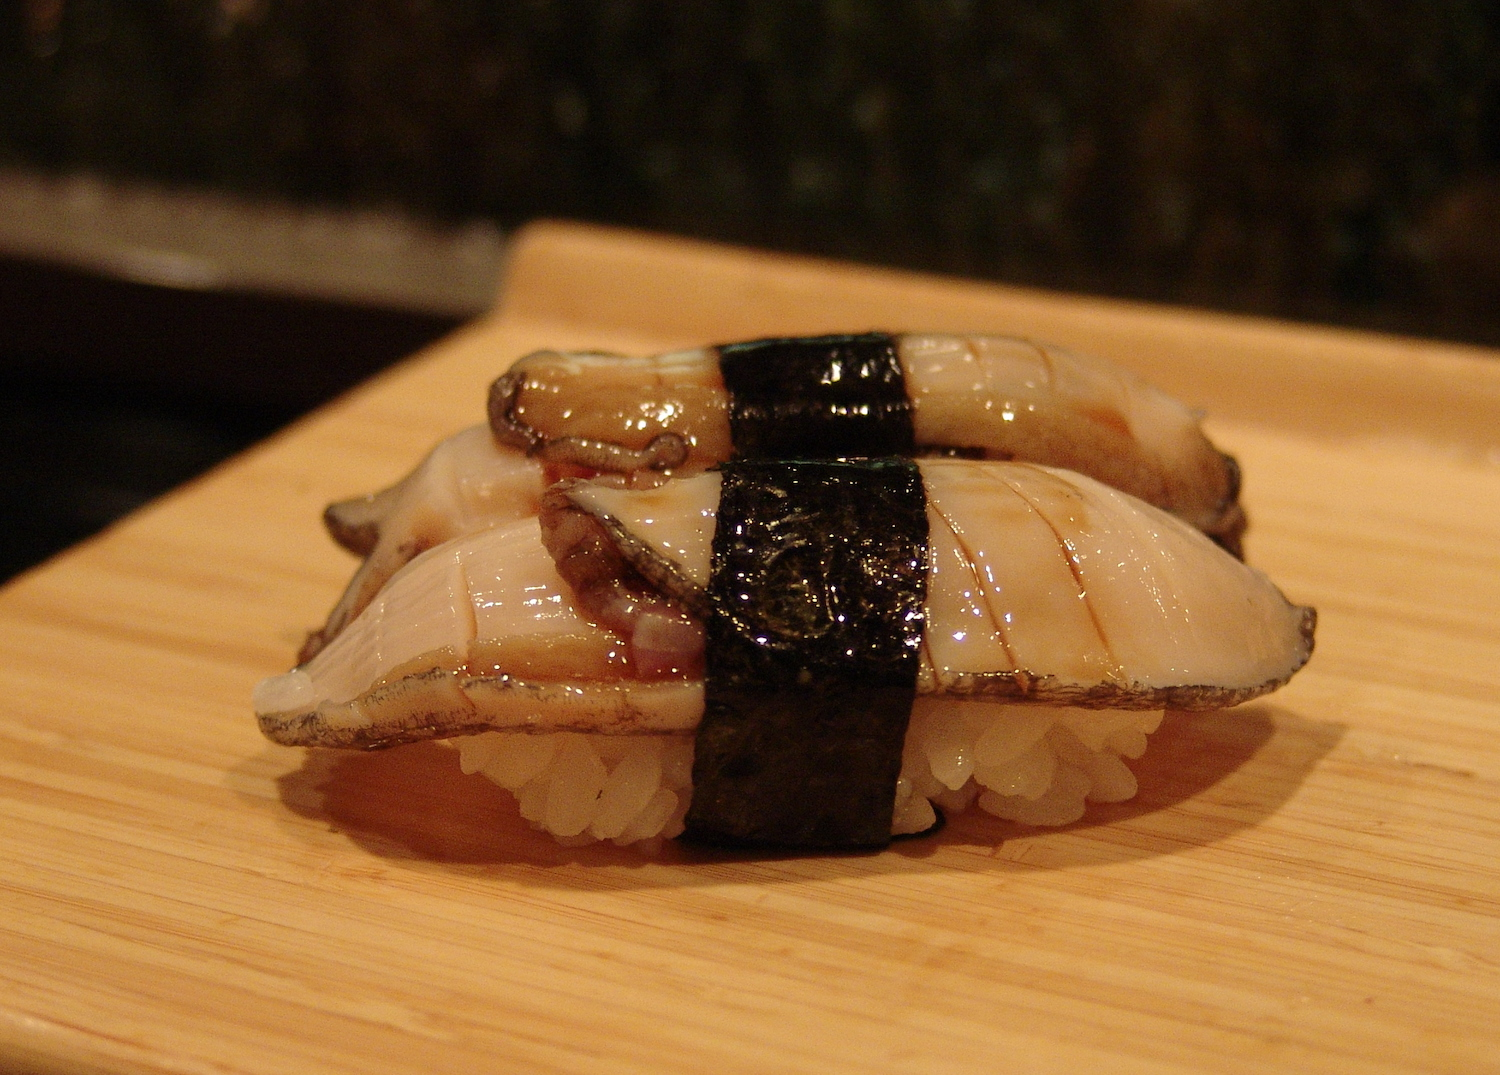

Image: Awabi (Abalone) Sushi

## Task
Predict the age of abalone from physical measurements only.

## Problem
Typically, the age of an abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope. This process is tedious and time-consuming.

## Solution
Create a machine learning algorithm that will predict the age of an abalone from physical measurements only.

I assessed the train and test RMSE for several predictive models in order to find the best model.

## Overview¶
1. Data Exploration and Pre-processing
2. Train-Test Split and Feature Engineering
3. Model Building (Baseline Test Performance)¶
4. Hyperparameter Tuning (Tuned Model Performance)
5. Conclusion

## Dataset information
* 8 attributes
* 4177 instances

*Sex*: nominal - M (male), F (female), I (infant)

*Length*: continuous - longest shell measurement (in mm)

*Diameter*: continuous - measurement perpendicular to legnth (in mm)

*Height*: continuous - with meat in shell (in mm)

*Whole weight*: continuous - the whole abalone (in grams)

*Shucked weight*: continuous - weight of the meat (in grams)

*Viscera weight*: continuous - gut weight after bleeding (in grams)

*Shell weight*: continuous - after being dried (in grams)

*Rings*: integer - +1.5 gives the age in years

## 1. Data Exploration and Pre-Processing

### 1.1. Preliminary Exploration and Pre-Processing

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
DATAPATH = '/content/abalone.csv'

data = pd.read_csv(DATAPATH, header=None, index_col=False)
data.columns = ['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole_weight    4177 non-null   float64
 5   shucked_weight  4177 non-null   float64
 6   viscera_weight  4177 non-null   float64
 7   shell_weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [ ]:
print(" \nCount total NaN at each column in a DataFrame : \n\n",
      data.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 sex               0
length            0
diameter          0
height            0
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
rings             0
dtype: int64


In [ ]:
data.drop_duplicates()
data.describe()

length     diameter       height  whole_weight  shucked_weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       viscera_weight  shell_weight        rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130000     8.000000  
50%          0.171000      0.234000     9.000000  
75%          0.253000      0.329000    11.000000  
max          0.760000      1.005000    29.000000

As expected, each of the features increases with the number of rings. This is because the more the abalones age, the bigger they become. 

In [ ]:
x_num=["length","diameter","height", "whole_weight","shucked_weight","viscera_weight","shell_weight"]
x_cat=["sex"]
y=["rings"]

### 1.2. Pearson Correlation

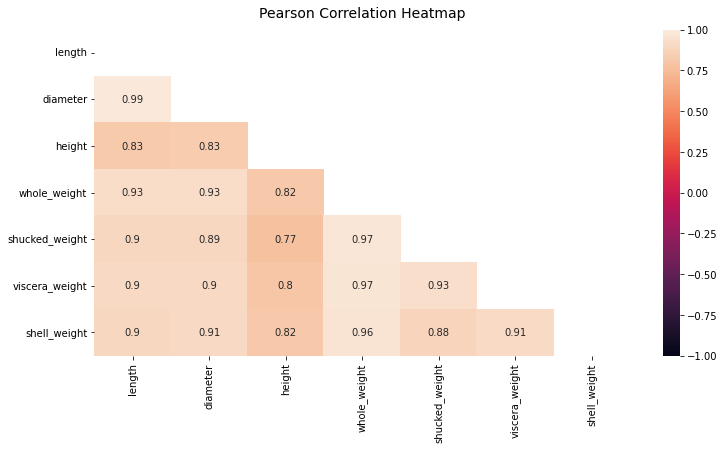

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

mask = np.triu(np.ones_like(data[x_num].corr(), dtype=bool))
heatmap=sns.heatmap(data[x_num].corr(), mask=mask, vmin=-1, vmax=1,annot=True)
heatmap.set_title('Pearson Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb93ab7dad0>,
      dtype=object)

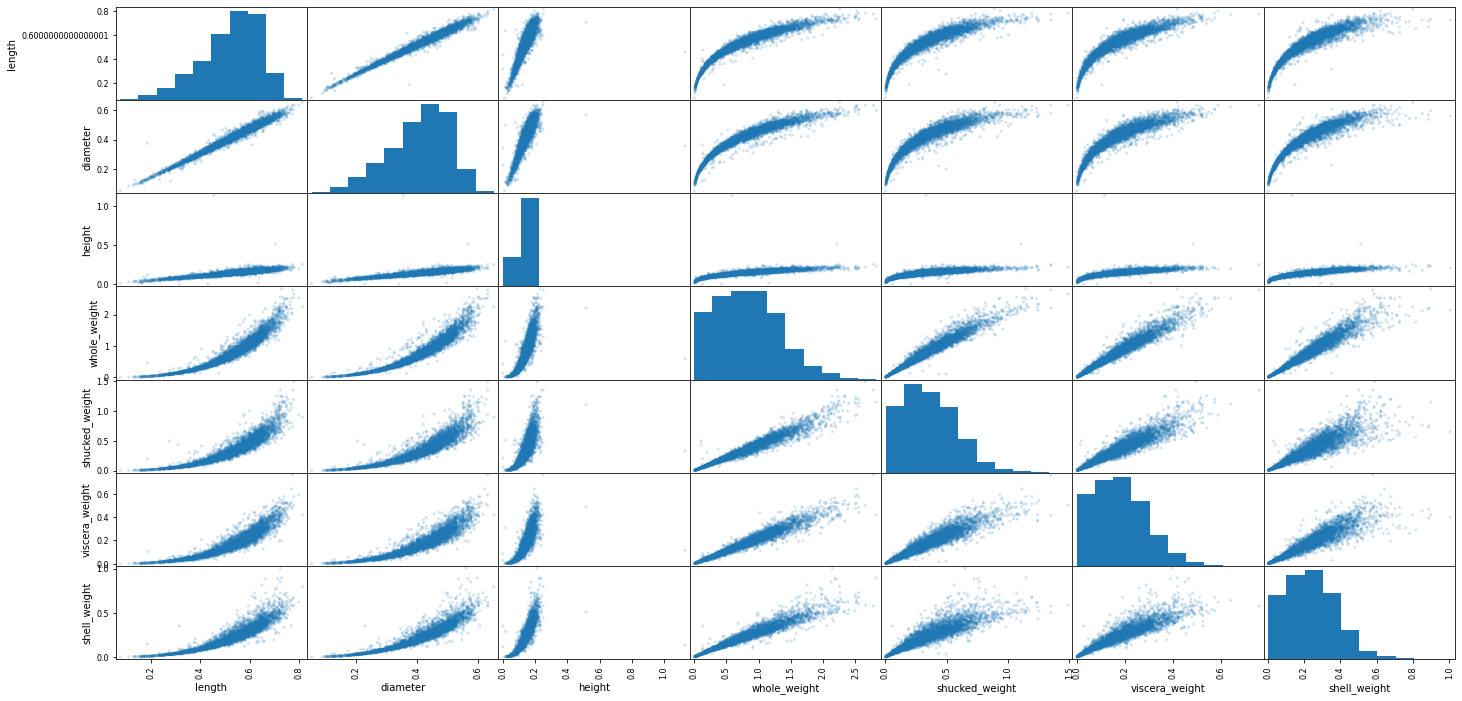

In [ ]:
pd.plotting.scatter_matrix(data[x_num],figsize=(24, 12), alpha=0.2)

Although according to the Pearson correlation the independent variables are very highly correlated, it seems like, based on the scatter plots, the relationship between the majority of features is curvilinear (not linear). It is still not clear whether reducing the number of dimensions is required.

### 1.3. Spearman Correlation

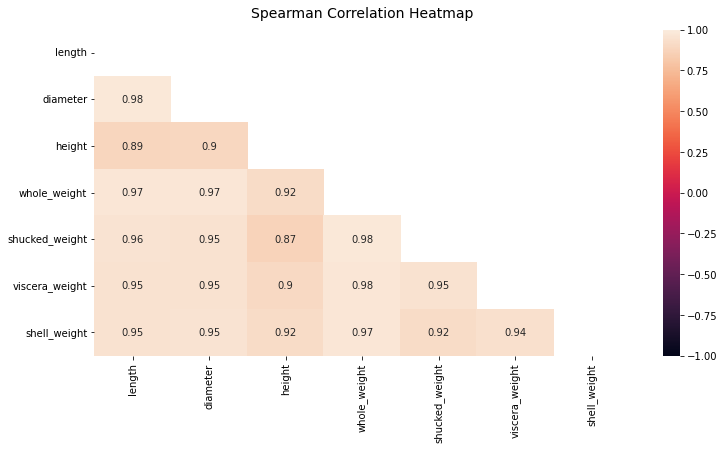

In [ ]:
from scipy.stats import spearmanr

plt.figure(figsize=(12, 6))

mask = np.triu(np.ones_like(data[x_num].corr("spearman"), dtype=bool))
heatmap=sns.heatmap(data[x_num].corr("spearman"), mask=mask, vmin=-1, vmax=1,annot=True)
heatmap.set_title('Spearman Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

Because the Spearman correlation seems to confirm the results from the Pearson correlation, I attempted to reduce the dimensionality of the data for the numeric features and de-correlate them (in the feature engineering part).

Note: Not all the features are perfectly monotonic.

### 1.4. Kendall Tau Correlation

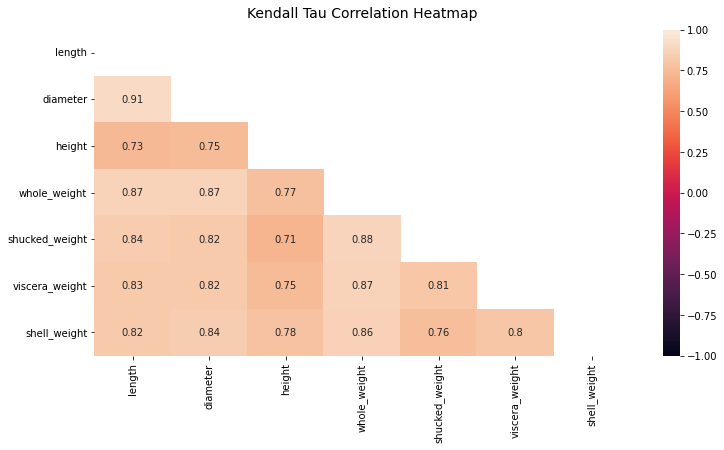

In [ ]:
from scipy.stats import kendalltau

plt.figure(figsize=(12, 6))

mask = np.triu(np.ones_like(data[x_num].corr("kendall"), dtype=bool))
heatmap=sns.heatmap(data[x_num].corr("kendall"), mask=mask, vmin=-1, vmax=1,annot=True)
heatmap.set_title('Kendall Tau Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


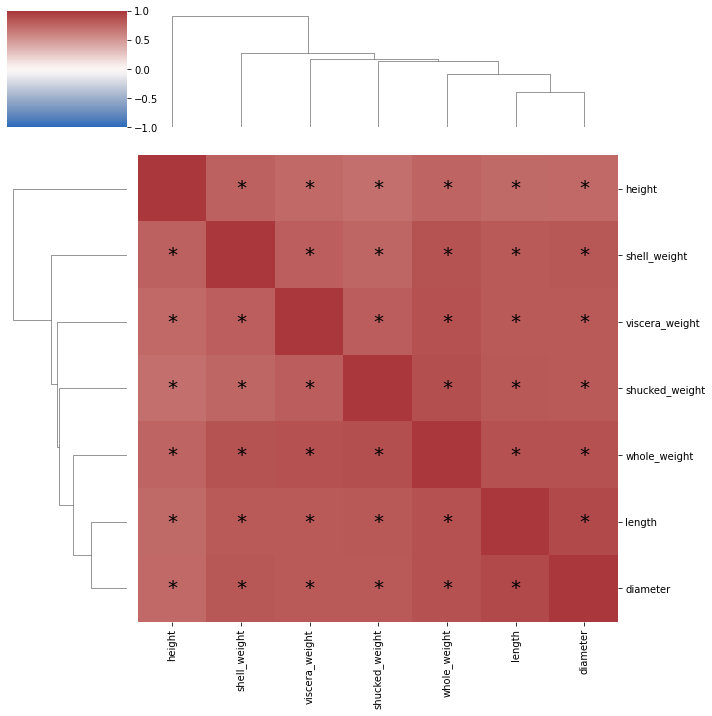

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.multitest import multipletests
from scipy.stats import kendalltau


def get_correlations(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how="outer")
    correlations = dfcols.transpose().join(dfcols, how="outer")
    for ix, r in enumerate(df.columns):
        for jx, c in enumerate(df.columns):
            kt = kendalltau(df[r], df[c])
            correlations[c][r] = kt[0]
            pvalues[c][r] = kt[1] if ix > jx else np.nan  # Only store values below the diagonal
    return correlations.astype("float"), pvalues.astype("float")


correlations, uncorrected_p_values = get_correlations(data[x_num])

# Correct p-values for multiple testing and check significance (True if the corrected p-value < 0.05)
shape = uncorrected_p_values.values.shape
significant_matrix = multipletests(uncorrected_p_values.values.flatten())[0].reshape(
    shape
)

# Here we start plotting

#mask = np.triu(correlations)
g = sns.clustermap(correlations, cmap="vlag", vmin=-1, vmax=1)


# Here labels on the y-axis are rotated
for tick in g.ax_heatmap.get_yticklabels():
    tick.set_rotation(0)

# Here we add asterisks onto cells with signficant correlations
for i, ix in enumerate(g.dendrogram_row.reordered_ind):
    for j, jx in enumerate(g.dendrogram_row.reordered_ind):
        if i != j:
            text = g.ax_heatmap.text(
                j + 0.5,
                i + 0.5,
                "*" if significant_matrix[ix, jx] or significant_matrix[jx, ix] else "",
                ha="center",
                va="center",
                color="black",
            )
            text.set_fontsize(20)

# Save a high-res copy of the image to disk
plt.tight_layout()
#plt.savefig("clustermap.png", dpi=200)
plt.show()

Because of the tied values afferent to each feature, the Kendall Tau coefficient is more reliable than the Spearman coefficient. In addition to this, all the p-values of the Kendall Tau test are significant; indicating monotonicity (the monotonicity requirement was satisfied according to the test). The Kendall Tau correlation coefficients seem more reasonable; displaying less extreme values.

However, because I do not 100% trust the p-values and correlations (I suspect the type i error might actually be higher than the one recorded and the correlations smaller), I decided to experiment using power analysis. Using the power analysis, I created a toy (reduced) sample in order to analyse the robustness of the correlations and p-values.

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R

install.packages("pwr")
library(pwr)
pwr.r.test(n=4177,r=0.77,sig.level=0.05)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/pwr_1.3-0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 80426 bytes (78 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to c


     approximate correlation power calculation (arctangh transformation) 

              n = 4177
              r = 0.77
      sig.level = 0.05
          power = 1
    alternative = two.sided



In [ ]:
%%R

install.packages("pwr")
library(pwr)
pwr.r.test(power =0.8,r=0.77,sig.level=1e-11)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/pwr_1.3-0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 80426 bytes (78 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to c


     approximate correlation power calculation (arctangh transformation) 

              n = 64.4756
              r = 0.77
      sig.level = 1e-11
          power = 0.8
    alternative = two.sided



In [ ]:
mini_sample=data.sample(n=65,random_state=31)

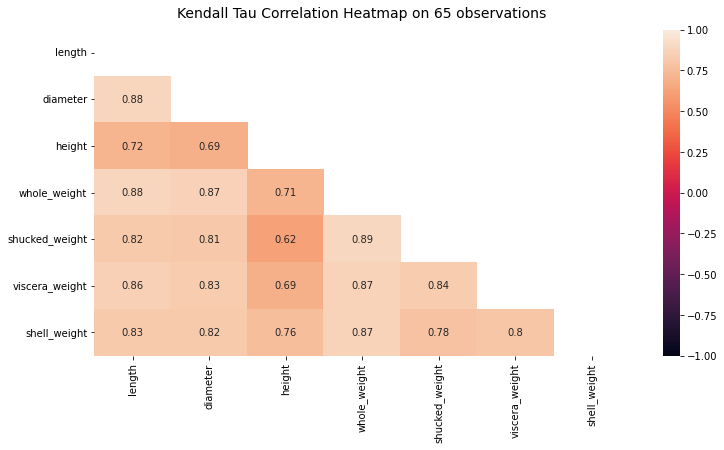

In [ ]:
plt.figure(figsize=(12, 6))

mask = np.triu(np.ones_like(mini_sample[x_num].corr("kendall"), dtype=bool))
heatmap=sns.heatmap(mini_sample[x_num].corr("kendall"), mask=mask, vmin=-1, vmax=1,annot=True)
heatmap.set_title('Kendall Tau Correlation Heatmap on 65 observations', fontdict={'fontsize':14}, pad=12);

Only using 65 observations decreases the overall level of Kendall Tau correlation. The most noticeable drop can be found in the case of the shucked_weight-height pair (from 0.71 to as low as 0.62). This indicates a high degree of uncertainty with regard to the true level of correlation. 

The next step is, therefore, to determine whether the correlations pairs afferent to the toy sample of 65 obervations are statistically significant.

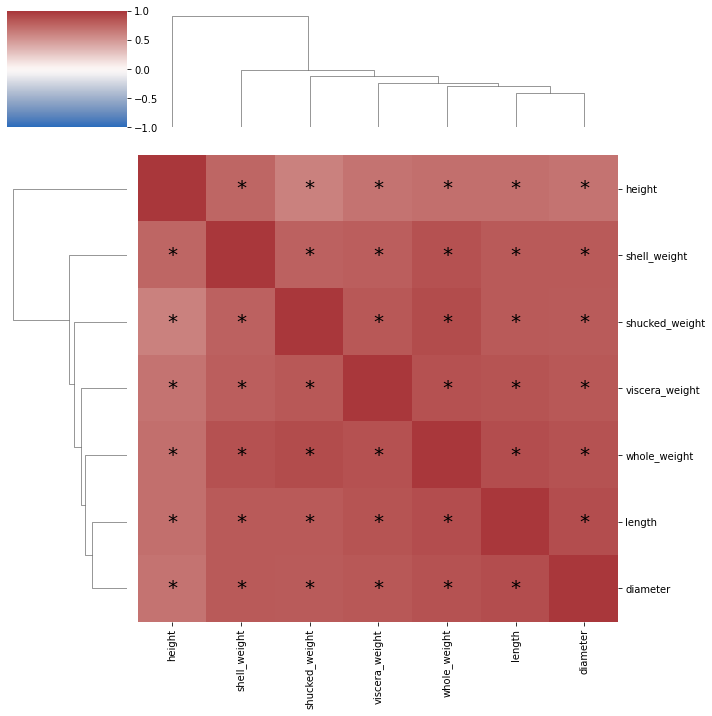

In [ ]:
correlations, uncorrected_p_values = get_correlations(mini_sample[x_num])

# Correct p-values for multiple testing and check significance (True if the corrected p-value < 0.05)
shape = uncorrected_p_values.values.shape
significant_matrix = multipletests(uncorrected_p_values.values.flatten())[0].reshape(
    shape
)

# Here we start plotting

#mask = np.triu(correlations)
g = sns.clustermap(correlations, cmap="vlag", vmin=-1, vmax=1)


# Here labels on the y-axis are rotated
for tick in g.ax_heatmap.get_yticklabels():
    tick.set_rotation(0)

# Here we add asterisks onto cells with signficant correlations
for i, ix in enumerate(g.dendrogram_row.reordered_ind):
    for j, jx in enumerate(g.dendrogram_row.reordered_ind):
        if i != j:
            text = g.ax_heatmap.text(
                j + 0.5,
                i + 0.5,
                "*" if significant_matrix[ix, jx] or significant_matrix[jx, ix] else "",
                ha="center",
                va="center",
                color="black",
            )
            text.set_fontsize(20)

# Save a high-res copy of the image to disk
plt.tight_layout()
#plt.savefig("clustermap.png", dpi=200)
plt.show()

In [ ]:
uncorrected_p_values

length      diameter        height  whole_weight  \
length                   NaN           NaN           NaN           NaN   
diameter        7.633431e-25           NaN           NaN           NaN   
height          1.728310e-16  1.738624e-15           NaN           NaN   
whole_weight    5.578981e-25  3.157289e-24  1.649195e-16           NaN   
shucked_weight  5.883204e-22  1.542376e-21  5.488436e-13  7.047624e-26   
viscera_weight  1.208313e-23  3.112880e-22  1.771379e-15  9.017955e-25   
shell_weight    5.848474e-22  5.115215e-22  1.643492e-18  8.488973e-25   

                shucked_weight  viscera_weight  shell_weight  
length                     NaN             NaN           NaN  
diameter                   NaN             NaN           NaN  
height                     NaN             NaN           NaN  
whole_weight               NaN             NaN           NaN  
shucked_weight             NaN             NaN           NaN  
viscera_weight    8.909940e-23             NaN           NaN  
shell_weight      3.740623e-20    4.185158e-21           NaN

The fact that the correlations for the toy data (65 observations) are statistically significant suggests that the actual level of correlation should be smaller than the one recorded.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb93ca23350>,
      dtype=object)

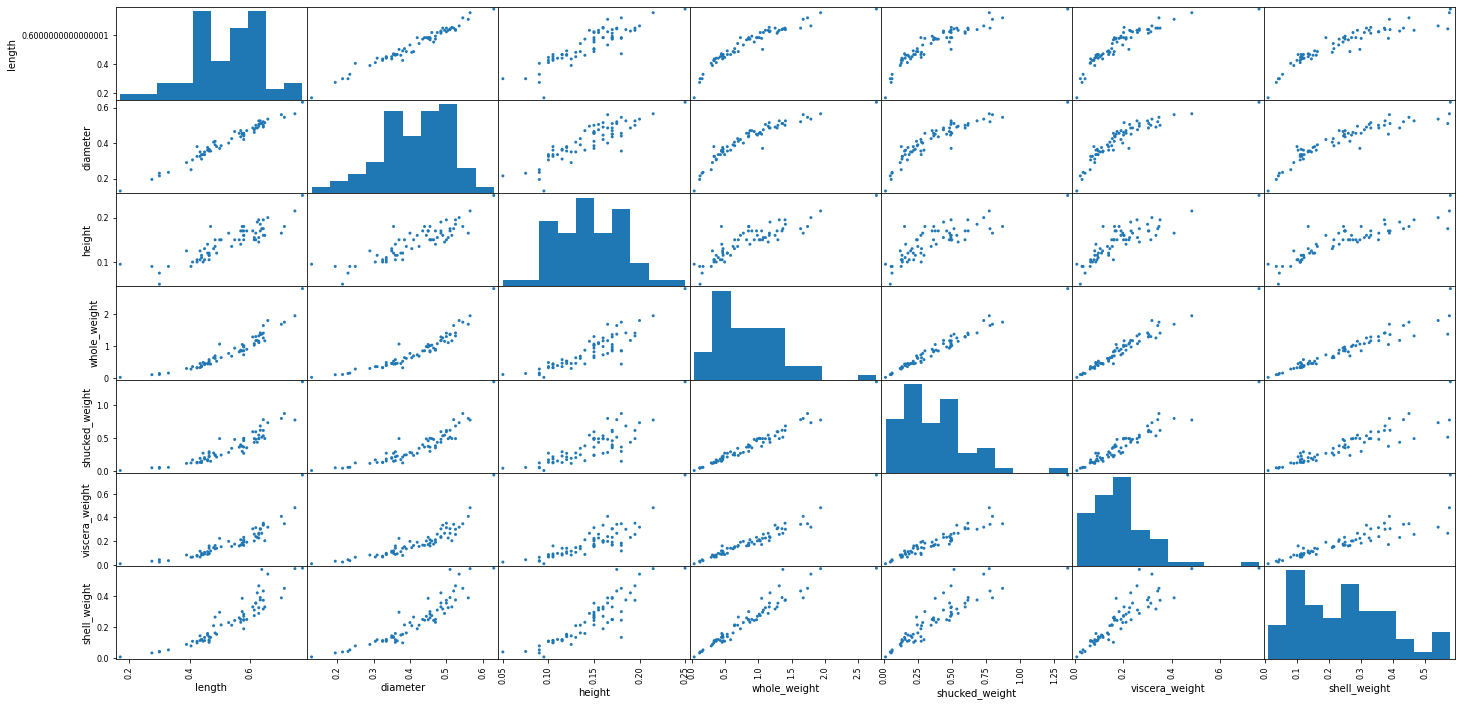

In [ ]:
pd.plotting.scatter_matrix(mini_sample[x_num],figsize=(24, 12), alpha=0.99)

### 1.5. Distance Correlation

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from biokit.viz import heatmap
import dcor
import copy

Creating directory /root/.config/biokit 
Creating directory /root/.config/bioservices 


/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [ ]:
def dist_corr(X, Y, pval=True, nruns=2000):
    """ Distance correlation with p-value from bootstrapping
    """
    dc = dcor.distance_correlation(X, Y)
    pv = dcor.independence.distance_covariance_test(X, Y, exponent=1.0, num_resamples=nruns)[0]

    if pval:
        return (dc, pv)
    else:
        return dc

In [ ]:
def corrfunc(x, y, **kws):
    d, p = dist_corr(x,y) 
    #print("{:.4f}".format(d), "{:.4f}".format(p))
    if p > 0.1:
        pclr = 'Darkgray'
    else:
        pclr= 'Darkblue'
    ax = plt.gca()
    #ax.annotate("p-value = {:.5f}".format(p), xy=(.1, 0.998), xycoords=ax.transAxes, color = pclr, fontsize = 14)
    ax.annotate("DC = {:.2f}".format(d), xy=(.1, 0.99), xycoords=ax.transAxes, color = pclr, fontsize = 14)

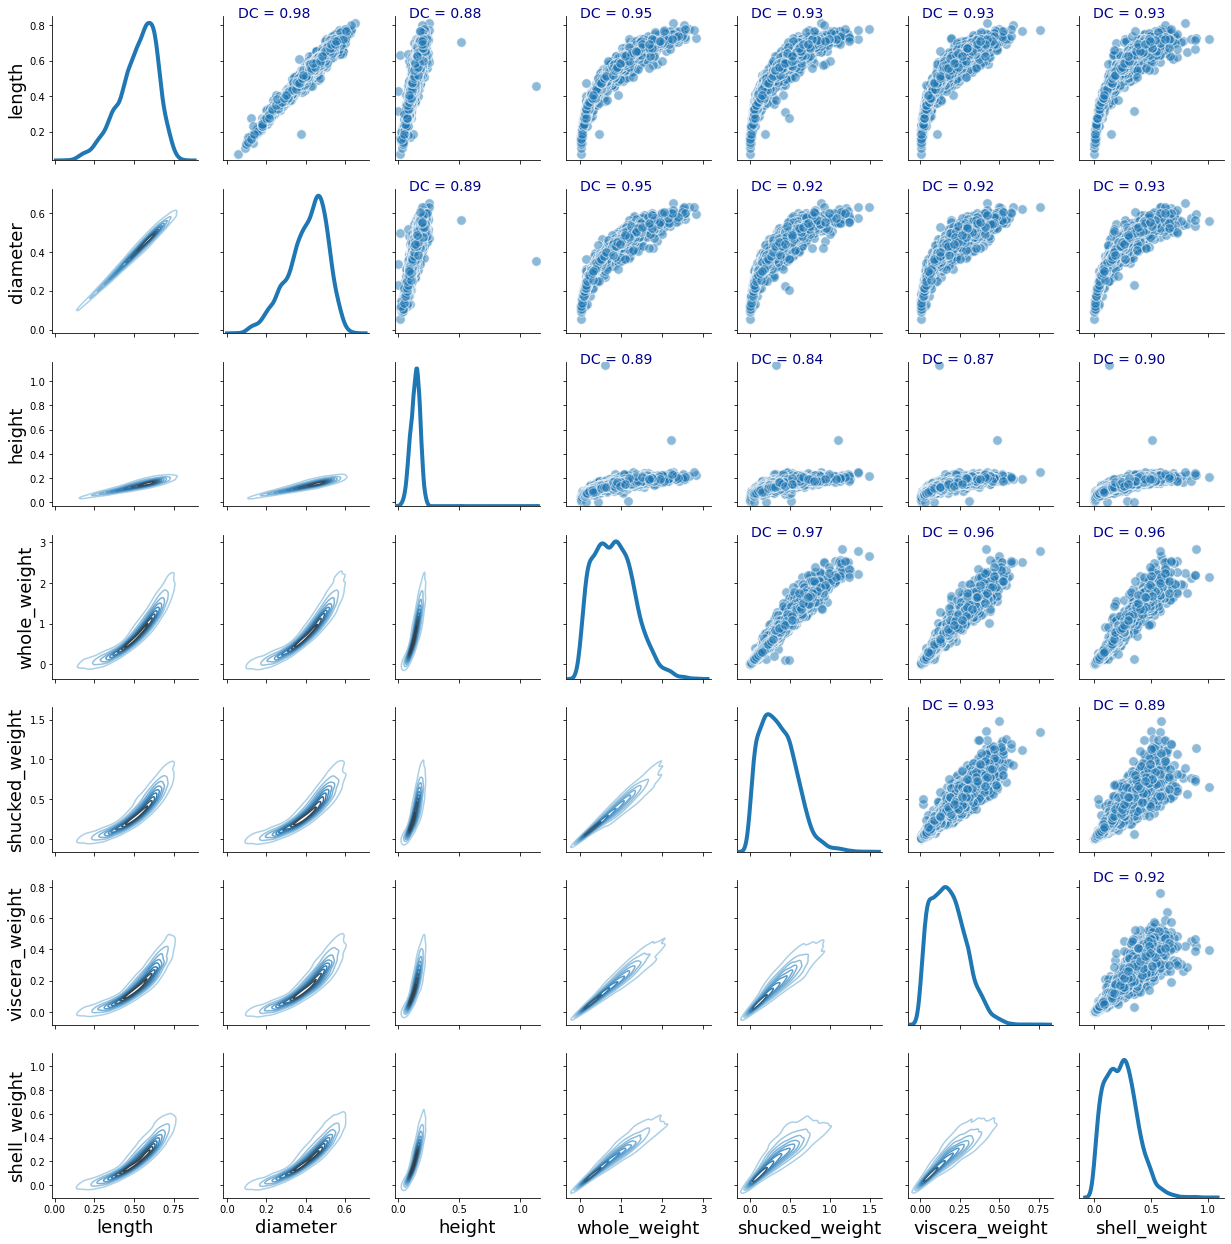

In [ ]:
plt.rcParams["axes.labelsize"] = 18
g = sns.PairGrid(data[x_num], diag_sharey=False)
axes = g.axes

g.map_upper(plt.scatter,  linewidths=1, edgecolor="w", s=90, alpha = 0.5)
g.map_upper(corrfunc)

g.map_diag(sns.kdeplot, lw = 4, legend=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")

#plt.savefig('matrix_final.png', dpi=500, bbox_inches='tight', pad_inches=0.1)
plt.show()

In [ ]:
def corrfunc(x, y, **kws):
    d, p = dist_corr(x,y) 
    #print("{:.4f}".format(d), "{:.4f}".format(p))
    if p > 0.1:
        pclr = 'Darkgray'
    else:
        pclr= 'Darkblue'
    ax = plt.gca()
    ax.annotate("p-value = {:.5f}".format(p), xy=(.1, 0.998), xycoords=ax.transAxes, color = pclr, fontsize = 14)
    #ax.annotate("DC = {:.2f}".format(d), xy=(.1, 0.99), xycoords=ax.transAxes, color = pclr, fontsize = 14)

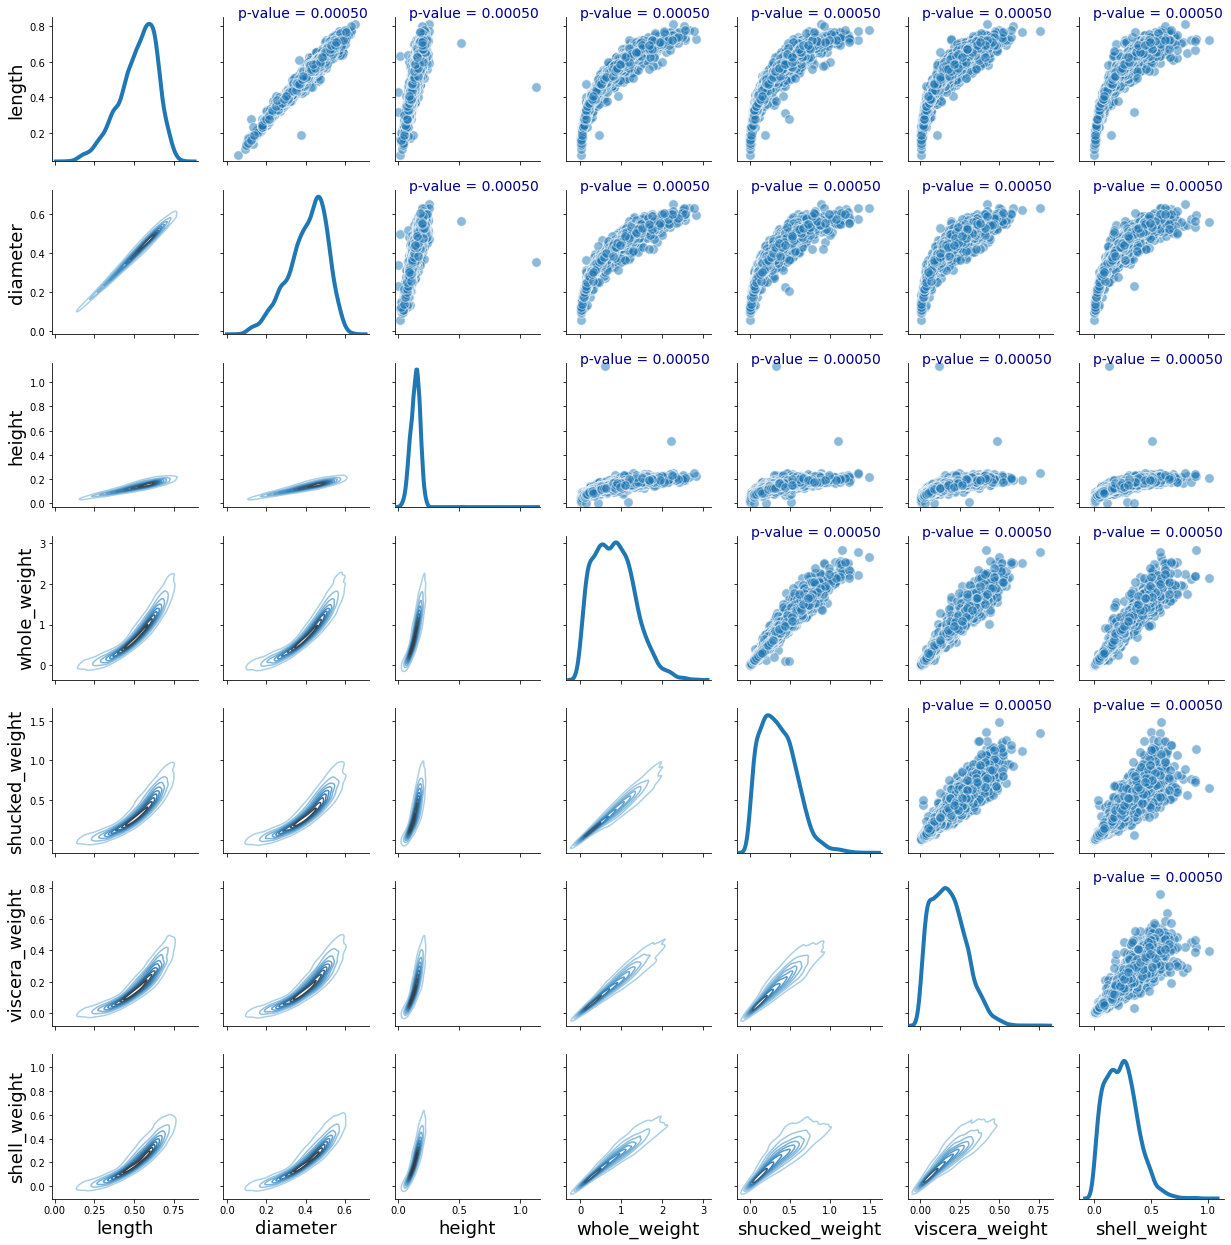

In [ ]:
plt.rcParams["axes.labelsize"] = 18
g = sns.PairGrid(data[x_num], diag_sharey=False)
axes = g.axes

g.map_upper(plt.scatter,  linewidths=1, edgecolor="w", s=90, alpha = 0.5)
g.map_upper(corrfunc)

g.map_diag(sns.kdeplot, lw = 4, legend=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")

#plt.savefig('matrix_final.png', dpi=500, bbox_inches='tight', pad_inches=0.1)
plt.show()

The bootstrapped p-values indicate a non-linear dependence between the pairs of features. The distance correlation coefficients are almost the same as in the case of the Pearson correlation. Just like the Pearson and Spearman correlations, however, the distance correlation does not handle tied values well (resulting in inflated correlations).

### 1.6. VIF (Variance Inflation Factor)

In [ ]:
data.columns

Index(['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight',
       'viscera_weight', 'shell_weight', 'rings'],
      dtype='object')

In [ ]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

#find design matrix for linear regression model using 'rating' as response variable 
y, X = dmatrices('rings ~ length+diameter+height+whole_weight+shucked_weight+viscera_weight+shell_weight', data=data, return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

#view VIF for each explanatory variable 
vif

VIF        variable
0   61.507786       Intercept
1   40.771813          length
2   41.845452        diameter
3    3.559939          height
4  109.592750    whole_weight
5   28.353191  shucked_weight
6   17.346276  viscera_weight
7   21.258289    shell_weight

Every feature displays a very high multicolinearity; with whole_weight having the highest VIF.

### 1.7. Additional EDA

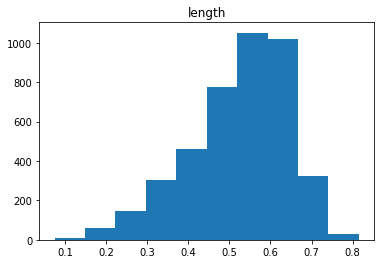

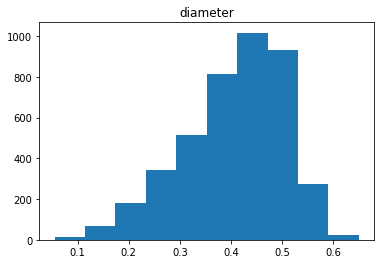

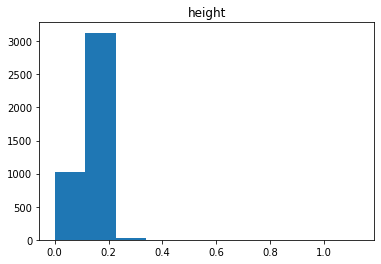

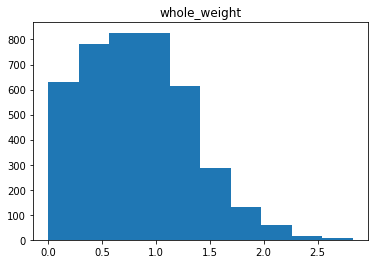

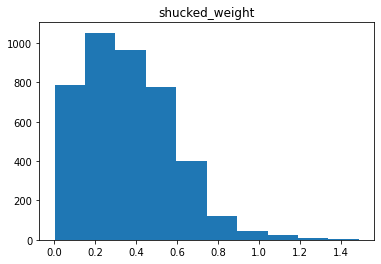

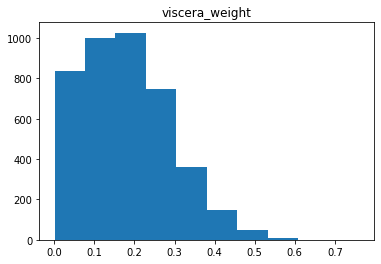

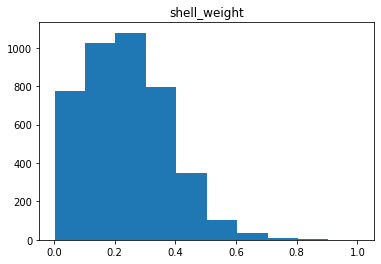

In [ ]:
#distributions for all numeric variables 

for i in data[x_num].columns:
    plt.hist(data[x_num][i])
    plt.title(i)
    plt.show()

Excluding the target variable (the rings), all the numeric variables are heavily skewed.

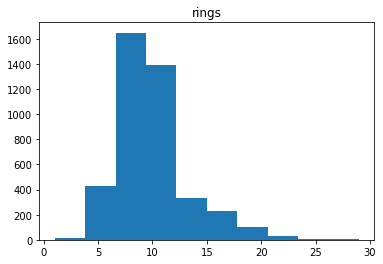

In [ ]:
plt.hist(data[y].rings)
plt.title("rings")
plt.show()

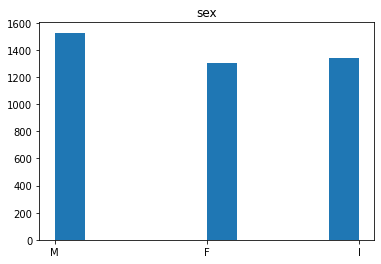

In [ ]:
plt.hist(data[x_cat].sex)
plt.title("sex")
plt.show()

In [ ]:
data[x_cat].value_counts()

sex
M      1528
I      1342
F      1307
dtype: int64

In [ ]:
data[x_cat].value_counts(normalize=True) 

sex
M      0.365813
I      0.321283
F      0.312904
dtype: float64

The classes in the sex variable seem well balanced. 

In [ ]:
data = pd.get_dummies(data)
data.head()

length  diameter  height  whole_weight  shucked_weight  viscera_weight  \
0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   shell_weight  rings  sex_F  sex_I  sex_M  
0         0.150     15      0      0      1  
1         0.070      7      0      0      1  
2         0.210      9      1      0      0  
3         0.155     10      0      0      1  
4         0.055      7      0      1      0

### 1.8. Preliminary conclusions of EDA

* The features are highly correlated (although there is some uncertainty regarding the true level of correlation).
* The relationships between each pairs of independent variables are non-linear (rather curvilinear). This might matter during feature engineering (when combining/ de-correlating features).
* There might be some non-linear dependencies between the pairs of features; indicating the need for more complex models. 

## 2. Train-Test Split and Feature Engineering

In order to successfully engineer the features, I will follow the following steps:
* Train-test split
* Outlier detection and treatment
* Yeo-Johnson transformation applied to every numeric variable and feature scaling
* Dimensionality reduction applied to the numeric variables
* Encompassing the final samples




### 2.1. Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

x_data = data.drop(["rings"],axis=1,inplace=False)

y_data = data[["rings"]]

x_train, x_test,y_train, y_test = train_test_split(x_data,y_data, random_state=31, test_size=0.2)

print(x_data.shape)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(4177, 10)
(3341, 10) (836, 10)
(3341, 1) (836, 1)


In [ ]:
from sklearn.linear_model import LinearRegression

x_train_benchmark = x_train
x_test_benchmark = x_test

lin_reg_orig = LinearRegression()
lin_reg_orig.fit(x_train_benchmark, y_train)

lin_reg_dev = lin_reg_orig.predict(x_train_benchmark)
lin_reg_pred = lin_reg_orig.predict(x_test_benchmark)

# Train set RMSE
train_rmse = mean_squared_error(y_train, lin_reg_dev, squared=False)
print(f'Train RMSE: {train_rmse}')

# Test set RMSE
test_rmse = mean_squared_error(y_test, lin_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

Train RMSE: 2.187309218127104
Test RMSE: 2.216768464903685


### 2.2. Feature Engineering

### 2.2.1. Outlier detection and treatment

I used an [adjusted Tukey fence](https://www.researchgate.net/publication/265731183_A_generalized_boxplot_for_skewed_and_heavy-tailed_distributions) to account for the skewness in the distribution of each of the variables together with winsorizing.


In [ ]:
# import numpy and statsmodels
import numpy as np
from statsmodels.stats.stattools import medcouple
import math

col_names=list(x_train[x_num].columns)
display(col_names)
for i in col_names:
 q1, q2, q3 = x_train[x_num][i].quantile([0.25,0.5,0.75])
 MC=medcouple(x_train[x_num][i])
 IQR =q3-q1
 lower_cap=q1-1.5*math.exp(-3.5*MC)*IQR
 upper_cap=q3+1.5*math.exp(4*MC)*IQR
 x_train[i]=x_train[x_num][i].apply(lambda x: upper_cap if x>(upper_cap) else (lower_cap if x<(lower_cap) else x))
 x_test[i]=x_test[x_num][i].apply(lambda x: upper_cap if x>(upper_cap) else (lower_cap if x<(lower_cap) else x))

['length',
 'diameter',
 'height',
 'whole_weight',
 'shucked_weight',
 'viscera_weight',
 'shell_weight']

In [ ]:
x_train.head()

length  diameter  height  whole_weight  shucked_weight  viscera_weight  \
2384   0.440     0.345   0.105        0.4285          0.1650          0.0830   
1989   0.280     0.210   0.075        0.1195          0.0530          0.0265   
1271   0.470     0.355   0.120        0.3930          0.1670          0.0885   
1958   0.650     0.520   0.150        1.2380          0.5495          0.2960   
1325   0.565     0.450   0.145        0.8495          0.4215          0.1685   

      shell_weight  sex_F  sex_I  sex_M  
2384        0.1320      1      0      0  
1989        0.0300      0      1      0  
1271        0.1150      0      1      0  
1958        0.3305      0      1      0  
1325        0.2250      1      0      0

In [ ]:
x_train.describe()

length     diameter       height  whole_weight  shucked_weight  \
count  3341.000000  3341.000000  3341.000000   3341.000000     3341.000000   
mean      0.525168     0.408750     0.139641      0.831548        0.360482   
std       0.118883     0.098263     0.038061      0.485698        0.220702   
min       0.075000     0.055000     0.040000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.447000        0.189000   
50%       0.545000     0.425000     0.140000      0.803500        0.336000   
75%       0.615000     0.480000     0.165000      1.160000        0.506500   
max       0.740021     0.580116     0.240000      2.345015        1.190974   

       viscera_weight  shell_weight        sex_F        sex_I        sex_M  
count     3341.000000   3341.000000  3341.000000  3341.000000  3341.000000  
mean         0.181681      0.238544     0.315474     0.316372     0.368153  
std          0.108933      0.135194     0.464774     0.465130     0.482375  
min          0.000500      0.001500     0.000000     0.000000     0.000000  
25%          0.094500      0.130000     0.000000     0.000000     0.000000  
50%          0.171500      0.235000     0.000000     0.000000     0.000000  
75%          0.254000      0.329000     1.000000     1.000000     1.000000  
max          0.577919      0.608621     1.000000     1.000000     1.000000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fafc39faf90>,
      dtype=object)

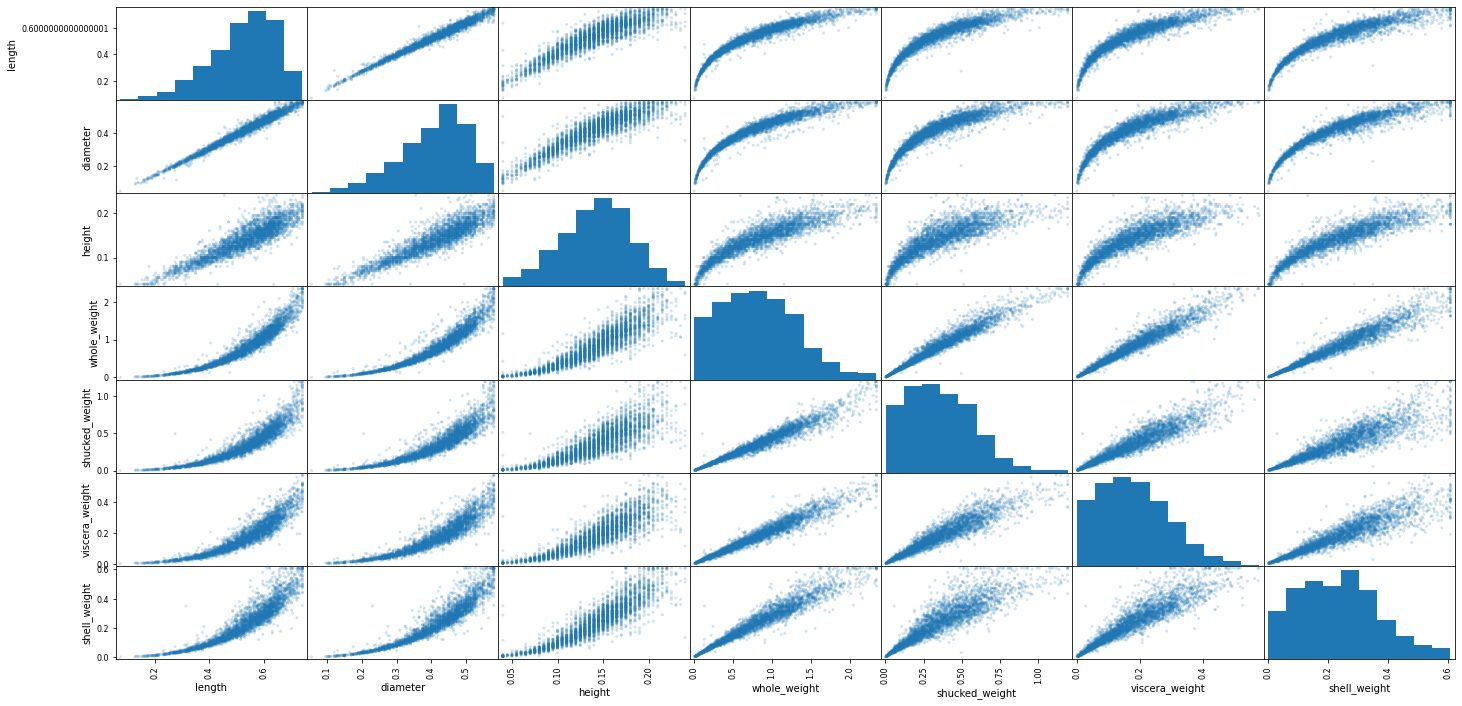

In [ ]:
pd.plotting.scatter_matrix(x_train[x_num],figsize=(24, 12), alpha=0.2)

In [ ]:
x_train_benchmark = x_train
x_test_benchmark = x_test

lin_reg_orig = LinearRegression()
lin_reg_orig.fit(x_train_benchmark, y_train)

lin_reg_dev = lin_reg_orig.predict(x_train_benchmark)
lin_reg_pred = lin_reg_orig.predict(x_test_benchmark)

# Train set RMSE
train_rmse = mean_squared_error(y_train, lin_reg_dev, squared=False)
print(f'Train RMSE: {train_rmse}')

# Test set RMSE
test_rmse = mean_squared_error(y_test, lin_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

Train RMSE: 2.168511969693928
Test RMSE: 2.2045871271780815


### 2.2.2. Yeo-Johnson transformation applied to every numeric variable and feature scaling
Because the features are highly skewed, I tried to make it slightly more normal using a Yeo-Johnson transformation. This should improve the performance of the predictive models.

The Yeo-Johnson transformation is an extension of Box-Cox transformation that can handle both positive and negative values. 

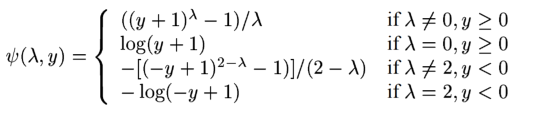

In [ ]:
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(method='yeo-johnson', standardize=True)
x_train_num_yj = power.fit_transform(x_train[x_num])
x_train_num_yj=pd.DataFrame(x_train_num_yj,columns=x_train[x_num].columns)

x_train_num_yj.head()

length  diameter    height  whole_weight  shucked_weight  viscera_weight  \
0 -0.817266 -0.755940 -0.924531     -0.806676       -0.899794       -0.918851   
1 -1.796207 -1.770184 -1.629115     -1.689694       -1.649553       -1.637724   
2 -0.589457 -0.664474 -0.552488     -0.898920       -0.887573       -0.854155   
3  1.132775  1.242956  0.232613      0.881689        0.923784        1.070810   
4  0.238841  0.335924  0.097889      0.154678        0.414544       -0.003581   

   shell_weight  
0     -0.766027  
1     -1.745019  
2     -0.917852  
3      0.742912  
4     -0.003667

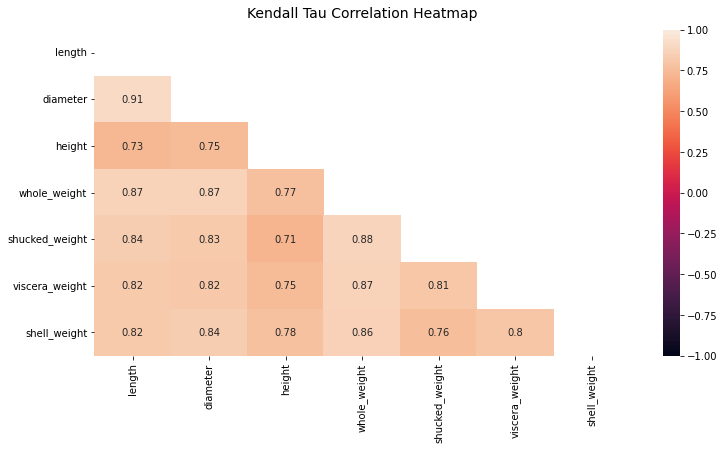

In [ ]:
plt.figure(figsize=(12, 6))

mask = np.triu(np.ones_like(x_train_num_yj.corr("kendall"), dtype=bool))
heatmap=sns.heatmap(x_train_num_yj.corr("kendall"), mask=mask, vmin=-1, vmax=1,annot=True)
heatmap.set_title('Kendall Tau Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

In [ ]:
x_test_num_yj = power.fit_transform(x_test[x_num])
x_test_num_yj=pd.DataFrame(x_test_num_yj,columns=x_test[x_num].columns)

x_test_num_yj.head()

length  diameter    height  whole_weight  shucked_weight  viscera_weight  \
0 -0.744164 -0.987323 -0.607811     -0.912075       -1.044215       -0.854455   
1  0.934545  1.331013  1.491634      1.026410        0.736126        0.824541   
2 -0.707798 -0.776782 -0.977207     -0.586240       -0.239939       -0.806240   
3 -0.402673 -0.263236 -0.103479     -0.285785       -0.368337       -0.263337   
4  1.041326  1.128040  0.946122      1.111815        0.818055        0.895759   

   shell_weight  
0     -0.816147  
1      1.526279  
2     -0.901557  
3     -0.443119  
4      2.032362

In [ ]:
x_test_num_yj.describe()

length      diameter        height  whole_weight  shucked_weight  \
count  8.360000e+02  8.360000e+02  8.360000e+02  8.360000e+02    8.360000e+02   
mean  -3.010617e-16  2.374496e-16 -6.772892e-17 -1.192560e-16    2.702517e-16   
std    1.000599e+00  1.000599e+00  1.000599e+00  1.000599e+00    1.000599e+00   
min   -2.417277e+00 -2.327903e+00 -2.380005e+00 -2.012476e+00   -1.980351e+00   
25%   -7.441637e-01 -7.330092e-01 -7.317833e-01 -7.738644e-01   -7.974610e-01   
50%    6.005472e-02  4.805139e-02  2.472545e-02  6.266394e-02    5.161556e-02   
75%    7.269253e-01  7.424351e-01  6.785672e-01  7.317763e-01    7.332291e-01   
max    2.224476e+00  2.138269e+00  2.770282e+00  2.380332e+00    2.633323e+00   

       viscera_weight  shell_weight  
count    8.360000e+02  8.360000e+02  
mean     4.422300e-17  1.899066e-17  
std      1.000599e+00  1.000599e+00  
min     -1.949463e+00 -1.982479e+00  
25%     -7.659900e-01 -8.005753e-01  
50%      4.482733e-02  5.514359e-02  
75%      7.593655e-01  7.477242e-01  
max      2.543572e+00  2.201664e+00

In [ ]:
x_train_benchmark = x_train_num_yj
x_test_benchmark = x_test_num_yj

lin_reg_orig = LinearRegression()
lin_reg_orig.fit(x_train_benchmark, y_train)

lin_reg_dev = lin_reg_orig.predict(x_train_benchmark)
lin_reg_pred = lin_reg_orig.predict(x_test_benchmark)

# Train set RMSE
train_rmse = mean_squared_error(y_train, lin_reg_dev, squared=False)
print(f'Train RMSE: {train_rmse}')

# Test set RMSE
test_rmse = mean_squared_error(y_test, lin_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

Train RMSE: 2.1787645322355336
Test RMSE: 2.2367942233358065


### 2.2.3. Dimensionality reduction applied to the numeric variables

The next step in this chapter is to de-correlate the numeric variables. I used two methods, applied linear regression using the emeddings as the independent variables and the number of rings as the and monitored their RMSE in order to see which performs better. These consist of:
* PCA (Principal Components Analysis)
* Kernel PCA
* PaCMAP (Pairwise Controlled Manifold Approximation)
* UMAP (Uniform Manifold Approximation and Projection)
* Vanilla Autoencoders
* Variational Autoencoders

The dimensionality reduction techniques that performed the best both in terms of test RMSE and its properties (orthogonal weights, uncorrelated features, and unit norm) are PCA along with Kernel PCA. The curvilinear relationships between the pairs of variables explain the very high efficiency of the Kernel PCA with sigmoid kernel. 



### 2.2.3.1. PCA (Principal Components Analysis)
I used PCA in order to try to de-correlate the variables. While the pricipal components preserve the global structure of the data, PCA does not do a good job preserving the local structure.

In [ ]:
from sklearn.preprocessing import scale # Data scaling
from sklearn import decomposition #PCA
import pandas as pd # pandas

pca = decomposition.PCA(n_components=6, random_state=31)
x_train_pc=x_train_num_yj
pca.fit(x_train_pc)

PCA(n_components=6, random_state=31)

In [ ]:
scores = pca.transform(x_train_pc)
x_train_pc = pd.DataFrame(scores, columns=['PC1', 'PC2', 'PC3','PC4','PC5','PC6'])
x_train_pc.head()

PC1       PC2       PC3       PC4       PC5       PC6
0 -2.223598  0.086315  0.168380  0.002264  0.026853 -0.032891
1 -4.505242  0.006391 -0.118897 -0.063041  0.023146 -0.029393
2 -2.030729 -0.132125  0.054721  0.258488 -0.217225  0.061057
3  2.365587  0.707145  0.167526  0.016605 -0.273730 -0.108388
4  0.468061  0.190567 -0.066845  0.320224  0.078582 -0.079368

In [ ]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.94891386, 0.02284587, 0.01082343, 0.00813589, 0.00627755,
       0.0022313 ])

In order to decide the number of principal components to be included in the model, I repeatedly fitted a linear regression using the rings as the target variable and the principal components as the independent variables. I tried using an increasing number of principal components until the drop in test error significantly slowed down. In the end, I decided to keep the first four principal components.

In [ ]:
x_train_pc.drop(['PC5','PC6'],axis=1,inplace=True)
x_train_pc.head()

PC1       PC2       PC3       PC4
0 -2.223598  0.086315  0.168380  0.002264
1 -4.505242  0.006391 -0.118897 -0.063041
2 -2.030729 -0.132125  0.054721  0.258488
3  2.365587  0.707145  0.167526  0.016605
4  0.468061  0.190567 -0.066845  0.320224

In [ ]:
x_test_pc=x_test_num_yj
scores = pca.transform(x_test_pc)
x_test_pc = pd.DataFrame(scores, columns=['PC1', 'PC2', 'PC3','PC4','PC5','PC6'])
x_test_pc.drop(['PC5','PC6'],axis=1,inplace=True)
x_test_pc.head()

PC1       PC2       PC3       PC4
0 -2.258804 -0.250652  0.052702 -0.012448
1  2.968057 -0.623449  0.476139  0.031550
2 -1.883524  0.442287 -0.273648  0.151018
3 -0.807957 -0.167332 -0.120793  0.045072
4  3.015601 -0.206793  0.785226 -0.406320

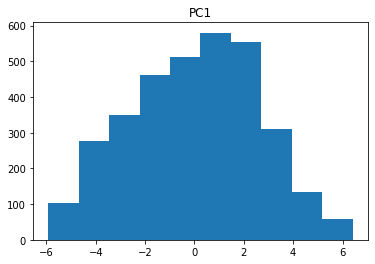

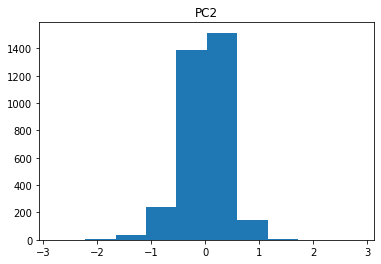

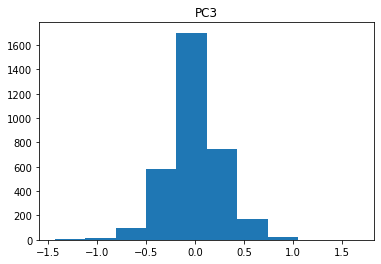

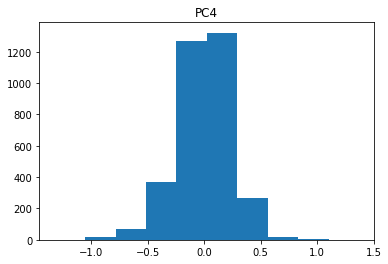

In [ ]:
for i in x_train_pc.columns:
    plt.hist(x_train_pc[i])
    plt.title(i)
    plt.show()

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


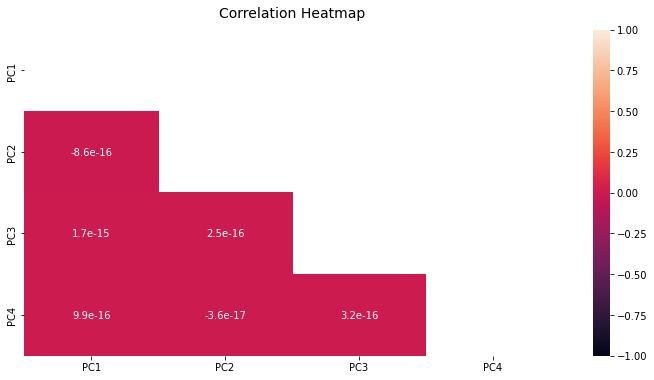

In [ ]:
plt.figure(figsize=(12, 6))

mask = np.triu(np.ones_like(x_train_pc.corr(), dtype=np.bool))
heatmap=sns.heatmap(x_train_pc.corr(), mask=mask, vmin=-1, vmax=1,annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(x_train_pc, y_train)

lin_reg_dev = lin_reg.predict(x_train_pc)
lin_reg_pred = lin_reg.predict(x_test_pc)

# Train set RMSE
train_rmse = mean_squared_error(y_train, lin_reg_dev, squared=False)
print(f'Train RMSE: {train_rmse}')

# Test set RMSE
test_rmse = mean_squared_error(y_test, lin_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

Train RMSE: 2.2309441690501592
Test RMSE: 2.2975123749798505


### 2.2.3.2. Kernel PCA (Principal Components Analysis)

In [ ]:
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import scale # Data scaling

In [ ]:
x_train_kpc=scale(x_train,with_mean=True, with_std=False)

kpca = KernelPCA(n_components=7,kernel='sigmoid')
x_train_after_kpca = kpca.fit_transform(x_train_kpc)

In [ ]:
expl_var_kpca = np.var(x_train_after_kpca, axis=0)
print('explained variance kpca: ', [np.round(x,5) for x in expl_var_kpca])

expl_var_ratio_kpca = expl_var_kpca / np.sum(expl_var_kpca)
print('explained variance ratio kpca: ', [np.round(x,5) for x in expl_var_ratio_kpca])

explained variance kpca:  [0.0212, 0.01392, 0.00576, 0.00013, 5e-05, 4e-05, 2e-05]
explained variance ratio kpca:  [0.51553, 0.3385, 0.14016, 0.00321, 0.00126, 0.00092, 0.00043]


In [ ]:
x_train_after_kpca = pd.DataFrame(x_train_after_kpca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])
x_train_after_kpca.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7
0 -0.025711  0.143275 -0.134254 -0.000972 -0.001982 -0.001393 -0.003846
1 -0.245851 -0.003278 -0.008369  0.001276  0.006770 -0.000024 -0.000041
2 -0.191564  0.003335  0.049434 -0.001793 -0.010791  0.003538 -0.001387
3 -0.045598  0.020929  0.201740  0.002788  0.005534  0.006685  0.001035
4  0.054074  0.149396 -0.058394  0.013612 -0.004854 -0.003835 -0.001111

In [ ]:
x_test_kpca=scale(x_test,with_mean=True, with_std=False)
#x_test_kpca=x_test_num_yj
scores = kpca.transform(x_test_kpca)
x_test_after_kpca = pd.DataFrame(scores, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])

x_test_after_kpca.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7
0 -0.191964  0.002869  0.040574 -0.006316 -0.003856  0.002739 -0.000501
1  0.151769 -0.124873  0.028455 -0.025180 -0.003508 -0.008968  0.001899
2 -0.168136  0.005525  0.066437  0.016025  0.003019 -0.003078 -0.002148
3  0.028940 -0.142168 -0.081115  0.000417 -0.000847  0.003354 -0.003609
4  0.163306 -0.123241  0.038419 -0.035102 -0.002477 -0.018626  0.011745

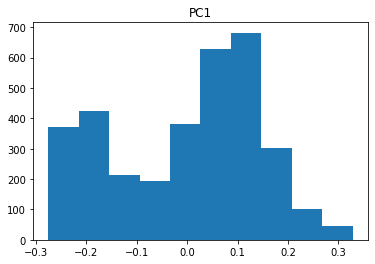

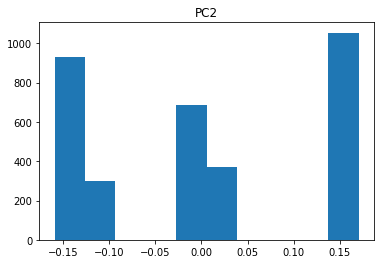

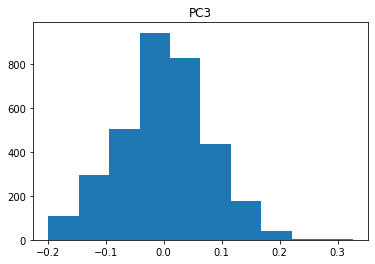

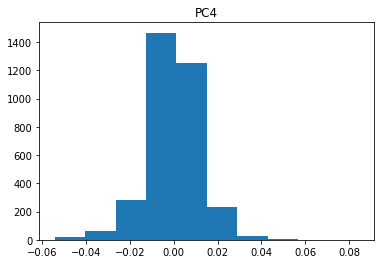

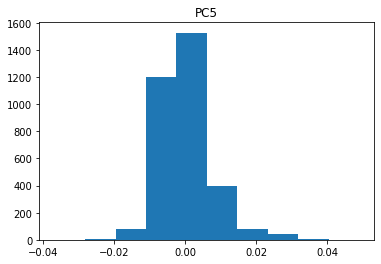

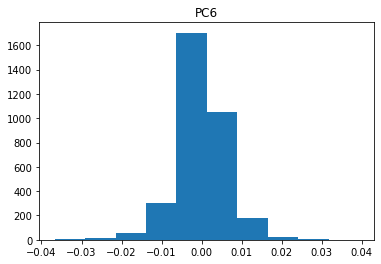

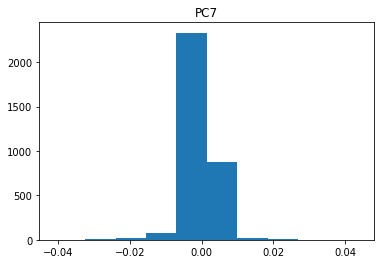

In [ ]:
for i in x_train_after_kpca.columns:
    plt.hist(x_train_after_kpca[i])
    plt.title(i)
    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


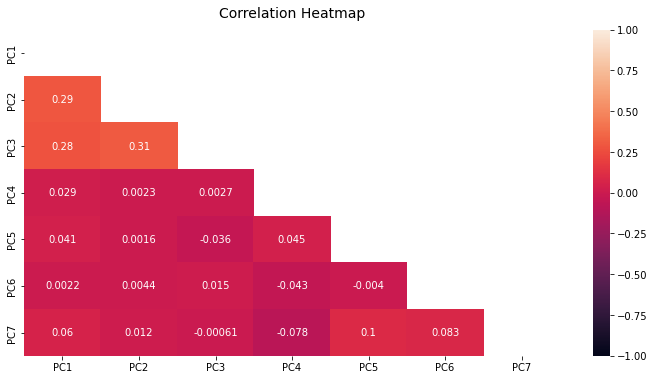

In [ ]:
plt.figure(figsize=(12, 6))

mask = np.triu(np.ones_like(x_train_after_kpca.corr("kendall"), dtype=np.bool))
heatmap=sns.heatmap(x_train_after_kpca.corr("kendall"), mask=mask, vmin=-1, vmax=1,annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(x_train_after_kpca, y_train)

lin_reg_dev = lin_reg.predict(x_train_after_kpca)
lin_reg_pred = lin_reg.predict(x_test_after_kpca)

# Train set RMSE
train_rmse = mean_squared_error(y_train, lin_reg_dev, squared=False)
print(f'Train RMSE: {train_rmse}')

# Test set RMSE
test_rmse = mean_squared_error(y_test, lin_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

Train RMSE: 2.2296607458534643
Test RMSE: 2.291586132491992


### 2.2.3.3. PaCMAP (Pairwise Controlled Manifold Approximation)
PaCMAP (Pairwise Controlled Manifold Approximation) is a dimensionality reduction method that can be used for visualization, preserving both local and global structure of the data in original space. PaCMAP optimizes the low dimensional embedding using three kinds of pairs of points: neighbor pairs (pair_neighbors), mid-near pair (pair_MN), and further pairs (pair_FP). For more information read this [paper](https://arxiv.org/abs/2012.04456).

In [ ]:
#!pip install pacmap 
#!pip install --upgrade tbb
#!pip install --upgrade numba

import pacmap
import matplotlib.pyplot as plt


In [ ]:
x_train_pacmap = x_train_num_yj.values
x_train_pacmap =x_train_pacmap.reshape(x_train_pacmap.shape[0], -1)

x_test_pacmap = x_test_num_yj.values
x_test_pacmap =x_test_pacmap.reshape(x_test_pacmap.shape[0], -1)

I tried to find the best configuration (combination of hyperparameters), I manually built a grid-search on train-test data consisting of possible combinations of the n_neighbors, MN_ratio and the FP_ratio hyperparameters. In order to do so, I used a cartesian product between the values of the aforementioned hyperparameters, looped through all the values and fitted a multiple linear regression with the emeddings as the independent variables and rings as the target feature.

In [ ]:
n_neighbors = np.linspace(5, 10, 5, endpoint=True)
MN_ratio = np.linspace(0.3, 0.75, 10, endpoint=True)
FP_ratio = np.linspace(1.55, 2.0, 10, endpoint=True)

from itertools import product

lists=[n_neighbors,MN_ratio,FP_ratio]

new_n_neighbors=[]
new_MN_ratio=[]
new_FP_ratio=[]

for elem in product(*lists):
  new_n_neighbors.append(elem[0])
  new_MN_ratio.append(elem[1])
  new_FP_ratio.append(elem[2])

In [ ]:
new_n_neighbors = [ round(elem, 2) for elem in new_n_neighbors ]
new_MN_ratio = [ round(elem, 2) for elem in new_MN_ratio ]
new_FP_ratio = [ round(elem, 2) for elem in new_FP_ratio ]

In [ ]:
import pandas as pd
from pandas import DataFrame

lin_reg = LinearRegression()

train_results = []
test_results = []
for (a, b, c) in zip(new_n_neighbors, new_MN_ratio, new_FP_ratio):
  embedding_train = pacmap.PaCMAP(n_components=4, n_neighbors=int(a), MN_ratio=b, FP_ratio=c,apply_pca=True)
  x_train_pacmap = embedding_train.fit_transform(x_train_pacmap, init="pca")
  embedding_test = pacmap.PaCMAP(n_components=4, n_neighbors=int(a), MN_ratio=b, FP_ratio=c,apply_pca=True)
  x_test_pacmap = embedding_test.fit_transform(x_test_pacmap, init="pca")
  lin_reg.fit(x_train_pacmap, y_train)
  lin_reg_dev = lin_reg.predict(x_train_pacmap)
  lin_reg_pred = lin_reg.predict(x_test_pacmap)
  train_rmse = mean_squared_error(y_train, lin_reg_dev, squared=False)
  test_rmse = mean_squared_error(y_test, lin_reg_pred, squared=False) 
  train_results.append(train_rmse)
  test_results.append(test_rmse)
  

In [ ]:
n_neighbors_df=pd.DataFrame(new_n_neighbors,columns=["Nb. of neighbours"]).reset_index(drop=True, inplace=False)
MN_ratio_df=pd.DataFrame(new_MN_ratio,columns=["MN ratio"]).reset_index(drop=True, inplace=False)
FP_ratio_df=pd.DataFrame(new_FP_ratio,columns=["FP ratio"]).reset_index(drop=True, inplace=False)
features=pd.concat([n_neighbors_df,MN_ratio_df,FP_ratio_df],axis=1)

train_results=pd.DataFrame(train_results,columns=["Training RMSE"])
test_results=pd.DataFrame(test_results,columns=["Test RMSE"])
features_grid=features.join([train_results,test_results],on=None, how="left",sort=False)
features_grid_top5=features_grid.sort_values(by='Test RMSE', ascending=True).head(5)
features_grid_top5

Nb. of neighbours  MN ratio  FP ratio  Training RMSE  Test RMSE
1                 5.00      0.30      1.60       2.647712   2.948263
2                 5.00      0.30      1.65       2.735255   3.122258
5                 5.00      0.30      1.80       2.940342   3.314203
181               6.25      0.70      1.60       3.155096   3.387149
11                5.00      0.35      1.60       3.134724   3.387409

In [ ]:
embedding_train = pacmap.PaCMAP(n_components=4, n_neighbors=5, MN_ratio=0.3, FP_ratio=1.60,apply_pca=True)
x_train_pacmap = embedding_train.fit_transform(x_train_pacmap, init="pca")
embedding_test = pacmap.PaCMAP(n_components=4, n_neighbors=5, MN_ratio=0.3, FP_ratio=1.60,apply_pca=True)
x_test_pacmap = embedding_test.fit_transform(x_test_pacmap, init="pca")

In [ ]:
x_train_after_pacmap = pd.DataFrame(x_train_pacmap,columns=["feature_1","feature_2","feature_3","feature_4"])

x_test_after_pacmap =pd.DataFrame(x_test_pacmap,columns=["feature_1","feature_2","feature_3","feature_4"])

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(x_train_after_pacmap, y_train)

lin_reg_dev = lin_reg.predict(x_train_after_pacmap)
lin_reg_pred = lin_reg.predict(x_test_after_pacmap)

# Train set RMSE
train_rmse = mean_squared_error(y_train, lin_reg_dev, squared=False)
print(f'Train RMSE: {train_rmse}')

# Test set RMSE
test_rmse = mean_squared_error(y_test, lin_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

Train RMSE: 2.486582634197448
Test RMSE: 2.654770751534002


`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


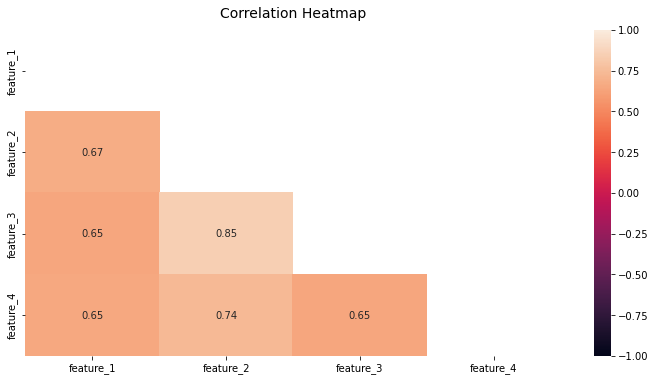

In [ ]:
plt.figure(figsize=(12, 6))

mask = np.triu(np.ones_like(x_train_after_pacmap.corr("kendall"), dtype=np.bool))
heatmap=sns.heatmap(x_train_after_pacmap.corr("kendall"), mask=mask, vmin=-1, vmax=1,annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

### 2.2.3.4. UMAP (Uniform Manifold Approximation and Projection)




In [ ]:
#!pip uninstall umap
#!pip install umap-learn
import umap.umap_ as umap


In [ ]:
x_train_umap = x_train_num_yj.values
x_train_umap =x_train_umap.reshape(x_train_umap.shape[0], -1)

x_test_umap = x_test_num_yj.values
x_test_umap =x_test_umap.reshape(x_test_umap.shape[0], -1)

In [ ]:
n_neighbors = np.linspace(5, 15, 10, endpoint=True)
min_dist = np.linspace(0.1, 0.5, 5, endpoint=True)
n_components = np.linspace(1, 4,4, endpoint=True)

from itertools import product

lists=[n_neighbors,min_dist,n_components]

new_n_neighbors=[]
new_min_dist=[]
new_n_components=[]

for elem in product(*lists):
  new_n_neighbors.append(elem[0])
  new_min_dist.append(elem[1])
  new_n_components.append(elem[2])

In [ ]:
new_n_neighbors = [ round(elem, 2) for elem in new_n_neighbors ]
new_min_dist = [ round(elem, 2) for elem in new_min_dist ]
new_n_components = [ round(elem, 2) for elem in new_n_components ]

In [ ]:
import pandas as pd
from pandas import DataFrame

lin_reg = LinearRegression()

train_results = []
test_results = []
for (a, b, c) in zip(new_n_neighbors, new_min_dist, new_n_components):
  embedding_train = umap.UMAP(n_components=int(c), n_neighbors=int(a), min_dist=b)
  x_train_umap = embedding_train.fit_transform(x_train_umap)
  embedding_test =umap.UMAP(n_components=int(c), n_neighbors=int(a), min_dist=b)
  x_test_umap = embedding_test.fit_transform(x_test_umap)
  lin_reg.fit(x_train_umap, y_train)
  lin_reg_dev = lin_reg.predict(x_train_umap)
  lin_reg_pred = lin_reg.predict(x_test_umap)
  train_rmse = mean_squared_error(y_train, lin_reg_dev, squared=False)
  test_rmse = mean_squared_error(y_test, lin_reg_pred, squared=False) 
  train_results.append(train_rmse)
  test_results.append(test_rmse)

The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
Graph is not fully connected, spectral embedding may not work as expected.
Graph is not fully connected, spectral embedding may not work as expected.
Graph is not fully connected, spectral embedding may not work as expected.
Graph is not fully connected, spectral embedding may not work as expected.
Graph is not fully connected, spectral embedding may not work as expected.


In [ ]:
n_neighbors_df=pd.DataFrame(new_n_neighbors,columns=["Nb. of neighbours"]).reset_index(drop=True, inplace=False)
min_dist_df=pd.DataFrame(new_min_dist,columns=["Min. distance"]).reset_index(drop=True, inplace=False)
n_components_df=pd.DataFrame(new_n_components,columns=["Nb. components"]).reset_index(drop=True, inplace=False)
features=pd.concat([n_neighbors_df,min_dist_df,n_components_df],axis=1)

train_results=pd.DataFrame(train_results,columns=["Training RMSE"])
test_results=pd.DataFrame(test_results,columns=["Test RMSE"])
features_grid=features.join([train_results,test_results],on=None, how="left",sort=False)
features_grid_top5=features_grid.sort_values(by='Test RMSE', ascending=True).head(5)
features_grid_top5

Nb. of neighbours  Min. distance  Nb. components  Training RMSE  \
0                 5.00            0.1             1.0       2.940442   
53                7.22            0.4             2.0       3.164274   
83                9.44            0.1             4.0       3.164538   
21                6.11            0.1             2.0       3.167932   
119              10.56            0.5             4.0       3.167245   

     Test RMSE  
0     3.095060  
53    3.413843  
83    3.416964  
21    3.419357  
119   3.425449

In [ ]:
embedding_train = umap.UMAP(n_components=1, n_neighbors=5, min_dist=0.1)
x_train_umap = embedding_train.fit_transform(x_train_umap)
embedding_test =umap.UMAP(n_components=1, n_neighbors=5, min_dist=0.1)
x_test_umap = embedding_test.fit_transform(x_test_umap)

In [ ]:
x_train_after_umap = pd.DataFrame(x_train_umap,columns=["feature_1"]).reset_index(drop=True, inplace=False)

x_test_after_umap =pd.DataFrame(x_test_umap,columns=["feature_1"]).reset_index(drop=True, inplace=False)

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(x_train_after_umap, y_train)

lin_reg_dev = lin_reg.predict(x_train_after_umap)
lin_reg_pred = lin_reg.predict(x_test_after_umap)

# Train set RMSE
train_rmse = mean_squared_error(y_train, lin_reg_dev, squared=False)
print(f'Train RMSE: {train_rmse}')

# Test set RMSE
test_rmse = mean_squared_error(y_test, lin_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

Train RMSE: 3.1685809103780245
Test RMSE: 3.4388875549952824


### 2.2.3.5. AE 1 (Vanilla Autoencoder-bottleneck+dense layer and constraints)

In [ ]:
from keras.models import Model
from keras.layers import Dense, Input
from keras.preprocessing import sequence
import tensorflow as tf

In [ ]:
import sklearn
import tensorflow as tf
from keras.models import Model, load_model
from keras.layers import Input, Dense, Layer, InputSpec
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers, activations, initializers, constraints, Sequential
from keras import backend as K
from keras.constraints import UnitNorm, Constraint
import math

In [ ]:
class DenseTied(Layer):
    def __init__(self, units,
                 activation=None,
                 use_bias=True,
                 kernel_initializer='glorot_uniform',
                 bias_initializer='zeros',
                 kernel_regularizer=None,
                 bias_regularizer=None,
                 activity_regularizer=None,
                 kernel_constraint=None,
                 bias_constraint=None,
                 tied_to=None,
                 **kwargs):
        self.tied_to = tied_to
        if 'input_shape' not in kwargs and 'input_dim' in kwargs:
            kwargs['input_shape'] = (kwargs.pop('input_dim'),)
        super().__init__(**kwargs)
        self.units = units
        self.activation = activations.get(activation)
        self.use_bias = use_bias
        self.kernel_initializer = initializers.get(kernel_initializer)
        self.bias_initializer = initializers.get(bias_initializer)
        self.kernel_regularizer = regularizers.get(kernel_regularizer)
        self.bias_regularizer = regularizers.get(bias_regularizer)
        self.activity_regularizer = regularizers.get(activity_regularizer)
        self.kernel_constraint = constraints.get(kernel_constraint)
        self.bias_constraint = constraints.get(bias_constraint)
        self.input_spec = InputSpec(min_ndim=2)
        self.supports_masking = True
                
    def build(self, input_shape):
        assert len(input_shape) >= 2
        input_dim = input_shape[-1]

        if self.tied_to is not None:
            self.kernel = K.transpose(self.tied_to.kernel)
            self._non_trainable_weights.append(self.kernel)
        else:
            self.kernel = self.add_weight(shape=(input_dim, self.units),
                                          initializer=self.kernel_initializer,
                                          name='kernel',
                                          regularizer=self.kernel_regularizer,
                                          constraint=self.kernel_constraint)
        if self.use_bias:
            self.bias = self.add_weight(shape=(self.units,),
                                        initializer=self.bias_initializer,
                                        name='bias',
                                        regularizer=self.bias_regularizer,
                                        constraint=self.bias_constraint)
        else:
            self.bias = None
        self.input_spec = InputSpec(min_ndim=2, axes={-1: input_dim})
        self.built = True

    def compute_output_shape(self, input_shape):
        assert input_shape and len(input_shape) >= 2
        output_shape = list(input_shape)
        output_shape[-1] = self.units
        return tuple(output_shape)

    def call(self, inputs):
        output = K.dot(inputs, self.kernel)
        if self.use_bias:
            output = K.bias_add(output, self.bias, data_format='channels_last')
        if self.activation is not None:
            output = self.activation(output)
        return output

In [ ]:
class WeightsOrthogonalityConstraint (Constraint):
    def __init__(self, encoding_dim, weightage = 1.0, axis = 0):
        self.encoding_dim = encoding_dim
        self.weightage = weightage
        self.axis = axis
        
    def weights_orthogonality(self, w):
        if(self.axis==1):
            w = K.transpose(w)
        if(self.encoding_dim > 1):
            m = K.dot(K.transpose(w), w) - tf.eye(self.encoding_dim)
            return self.weightage * K.sqrt(K.sum(K.square(m)))
        else:
            m = K.sum(w ** 2) - 1.
            return m

    def __call__(self, w):
        return self.weights_orthogonality(w)

In [ ]:
class UncorrelatedFeaturesConstraint (Constraint):

    def __init__(self, encoding_dim, weightage=1.0):
        self.encoding_dim = encoding_dim
        self.weightage = weightage

    def get_covariance(self, x):
        x_centered_list = []

        for i in range(self.encoding_dim):
            x_centered_list.append(x[:, i] - K.mean(x[:, i]))

        x_centered = tf.stack(x_centered_list)
        covariance = K.dot(x_centered, K.transpose(x_centered)) / \
            tf.cast(x_centered.get_shape()[0], tf.float32)

        return covariance

    # Constraint penalty
    def uncorrelated_feature(self, x):
        if(self.encoding_dim <= 1):
            return 0.0
        else:
            output = K.sum(K.square(
                self.covariance - tf.math.multiply(self.covariance, tf.eye(self.encoding_dim))))
            return output

    def __call__(self, x):
        self.covariance = self.get_covariance(x)
        return self.weightage * self.uncorrelated_feature(x)

In [ ]:
nb_epoch = 25
batch_size = 16
input_dim = x_train[x_num].shape[1] #num of predictor variables, 
encoding_dim = 3
learning_rate = 1e-3

In [ ]:
tf.config.run_functions_eagerly(True)


encoder = Dense(encoding_dim, activation="linear", input_shape=(input_dim,), use_bias = True, kernel_regularizer=WeightsOrthogonalityConstraint(encoding_dim, weightage=1., axis=0), kernel_constraint=UnitNorm(axis=0)) 
decoder = DenseTied(input_dim, activation="linear", tied_to=encoder, use_bias = False)

autoencoder = Sequential()
autoencoder.add(encoder)
autoencoder.add(decoder)

autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='sgd')
autoencoder.summary()

autoencoder.fit(x_train[x_num], x_train[x_num],
                epochs=nb_epoch,
                batch_size=batch_size,
                shuffle=True,
                verbose=1)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 3)                 24        
                                                                 
 dense_tied_6 (DenseTied)    (None, 7)                 45        
                                                                 
Total params: 45
Trainable params: 24
Non-trainable params: 21
_________________________________________________________________
Epoch 1/25
  4/209 [..............................] - ETA: 3s - loss: 1.3282 - accuracy: 0.0625    

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


209/209 [==============================] - 4s 21ms/step - loss: 0.1995 - accuracy: 0.2161
Epoch 2/25
209/209 [==============================] - 4s 18ms/step - loss: 0.0899 - accuracy: 0.2580
Epoch 3/25
209/209 [==============================] - 4s 18ms/step - loss: 0.0896 - accuracy: 0.2580
Epoch 4/25
209/209 [==============================] - 4s 17ms/step - loss: 0.0894 - accuracy: 0.2580
Epoch 5/25
209/209 [==============================] - 4s 17ms/step - loss: 0.0893 - accuracy: 0.2583
Epoch 6/25
209/209 [==============================] - 4s 17ms/step - loss: 0.0892 - accuracy: 0.2583
Epoch 7/25
209/209 [==============================] - 4s 17ms/step - loss: 0.0892 - accuracy: 0.2583
Epoch 8/25
209/209 [==============================] - 4s 17ms/step - loss: 0.0891 - accuracy: 0.2583
Epoch 9/25
209/209 [==============================] - 4s 17ms/step - loss: 0.0891 - accuracy: 0.2583
Epoch 10/25
209/209 [==============================] - 3s 17ms/step - loss: 0.0891 - accuracy: 0.2583


In [ ]:
train_predictions = autoencoder.predict(x_train[x_num])
print('Train reconstrunction error\n', sklearn.metrics.mean_squared_error(x_train[x_num], train_predictions))
test_predictions = autoencoder.predict(x_test[x_num])
print('Test reconstrunction error\n', sklearn.metrics.mean_squared_error(x_test[x_num], test_predictions))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Train reconstrunction error
 0.06907346990048223
Test reconstrunction error
 0.06797912449612305


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


In [ ]:
w_encoder = np.round(autoencoder.layers[0].get_weights()[0], 2).T  # W in Figure 2.
w_decoder = np.round(autoencoder.layers[1].get_weights()[0], 2)  # W' in Figure 2.
print('Encoder weights \n', w_encoder)
print('Decoder weights \n', w_decoder)

Encoder weights 
 [[-0.56  0.48 -0.33  0.06 -0.09 -0.37  0.45]
 [ 0.47  0.56 -0.27  0.19  0.56  0.18  0.  ]
 [ 0.34  0.3   0.59  0.38 -0.28 -0.47  0.03]]
Decoder weights 
 [[-0.56  0.47  0.34]
 [ 0.48  0.56  0.3 ]
 [-0.33 -0.27  0.59]
 [ 0.06  0.19  0.38]
 [-0.09  0.56 -0.28]
 [-0.37  0.18 -0.47]
 [ 0.45  0.    0.03]]


In [ ]:
np.round(np.dot(w_encoder, w_encoder.T), 3)

array([[ 1.004e+00, -1.100e-02, -6.000e-03],
       [-1.100e-02,  9.900e-01, -1.000e-03],
       [-6.000e-03, -1.000e-03,  9.980e-01]], dtype=float32)

In [ ]:
np.round(np.dot(w_decoder, w_decoder.T), 3)


array([[ 0.65 ,  0.096,  0.258,  0.185,  0.218,  0.132, -0.242],
       [ 0.096,  0.634, -0.133,  0.249,  0.186, -0.218,  0.225],
       [ 0.258, -0.133,  0.53 ,  0.153, -0.287, -0.204, -0.131],
       [ 0.185,  0.249,  0.153,  0.184, -0.005, -0.167,  0.038],
       [ 0.218,  0.186, -0.287, -0.005,  0.4  ,  0.266, -0.049],
       [ 0.132, -0.218, -0.204, -0.167,  0.266,  0.39 , -0.181],
       [-0.242,  0.225, -0.131,  0.038, -0.049, -0.181,  0.203]],
      dtype=float32)

In [ ]:
encoder_layer = Model(inputs=autoencoder.inputs, outputs=autoencoder.layers[0].output)
encoded_features = np.array(encoder_layer.predict(x_train[x_num]))
print('Encoded feature covariance\n', np.cov(encoded_features.T))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Encoded feature covariance
 [[ 7.05849862e-04 -1.12752099e-03 -9.24058329e-07]
 [-1.12752099e-03  1.08851126e-01  5.44973933e-02]
 [-9.24058329e-07  5.44973933e-02  2.88025696e-02]]


In [ ]:
print('Encoder weights norm, \n', np.sum(w_encoder ** 2, axis = 1))
print('Decoder weights norm, \n', np.sum(w_decoder ** 2, axis = 1))

Encoder weights norm, 
 [1.004      0.9895     0.99829996]
Decoder weights norm, 
 [0.6501     0.63400006 0.52989995 0.1841     0.4001     0.39020002
 0.20339999]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


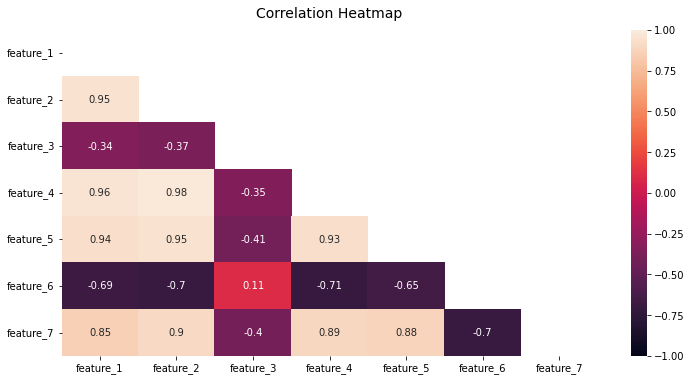

In [ ]:
plt.figure(figsize=(12, 6))

mask = np.triu(np.ones_like(x_train_autoenc.corr("kendall"), dtype=np.bool))
heatmap=sns.heatmap(x_train_autoenc.corr("kendall"), mask=mask, vmin=-1, vmax=1,annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

In [ ]:
x_train_autoenc = pd.DataFrame(train_predictions,columns=["feature_1","feature_2","feature_3","feature_4","feature_5","feature_6","feature_7"])
x_test_autoenc =pd.DataFrame(test_predictions,columns=["feature_1","feature_2","feature_3","feature_4","feature_5","feature_6","feature_7"])

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(x_train_autoenc, y_train)

lin_reg_dev = lin_reg.predict(x_train_autoenc)
lin_reg_pred = lin_reg.predict(x_test_autoenc)

# Train set RMSE
train_rmse = mean_squared_error(y_train, lin_reg_dev, squared=False)
print(f'Train RMSE: {train_rmse}')

# Test set RMSE
test_rmse = mean_squared_error(y_test, lin_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

Train RMSE: 2.2316554001165887
Test RMSE: 2.2169469341879933


## 2.2.3.6. AE 2 (Vanilla Autoencoder-bottleneck+dense layer and constraints)

In [ ]:
x_train_autoenc=x_train_num_yj
x_test_autoenc=x_test_num_yj
encoding_dim = 6

In [ ]:
tf.random.set_seed(31)
inputs_dim = x_train_autoenc.shape[1]
tf.config.run_functions_eagerly(True)



encoder = Dense(encoding_dim, activation="linear", input_shape=(input_dim,), use_bias = True,
                activity_regularizer=UncorrelatedFeaturesConstraint(encoding_dim, weightage=1.),kernel_regularizer=WeightsOrthogonalityConstraint(encoding_dim, weightage=1., axis=0), kernel_constraint=UnitNorm(axis=0)) 
decoder = DenseTied(input_dim, activation="linear", tied_to=encoder, use_bias = False)

autoencoder = Sequential()
autoencoder.add(encoder)
autoencoder.add(decoder)

autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='sgd')
autoencoder.summary()

autoencoder.fit(x_train_autoenc,x_train_autoenc,
                epochs=nb_epoch,
                batch_size=batch_size,
                shuffle=True,
                verbose=1)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 6)                 48        
                                                                 
 dense_tied_3 (DenseTied)    (None, 7)                 90        
                                                                 
Total params: 90
Trainable params: 48
Non-trainable params: 42
_________________________________________________________________
Epoch 1/25
  4/209 [..............................] - ETA: 4s - loss: 5.9858 - accuracy: 0.2188

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


209/209 [==============================] - 6s 27ms/step - loss: 1.1737 - accuracy: 0.3083
Epoch 2/25
209/209 [==============================] - 6s 26ms/step - loss: 0.5753 - accuracy: 0.3265
Epoch 3/25
209/209 [==============================] - 6s 29ms/step - loss: 0.5759 - accuracy: 0.3268
Epoch 4/25
209/209 [==============================] - 5s 25ms/step - loss: 0.5789 - accuracy: 0.3304
Epoch 5/25
209/209 [==============================] - 5s 26ms/step - loss: 0.5776 - accuracy: 0.3260
Epoch 6/25
209/209 [==============================] - 5s 24ms/step - loss: 0.5765 - accuracy: 0.3355
Epoch 7/25
209/209 [==============================] - 5s 24ms/step - loss: 0.5731 - accuracy: 0.3322
Epoch 8/25
209/209 [==============================] - 5s 24ms/step - loss: 0.5692 - accuracy: 0.3304
Epoch 9/25
209/209 [==============================] - 5s 24ms/step - loss: 0.5742 - accuracy: 0.3298
Epoch 10/25
209/209 [==============================] - 5s 23ms/step - loss: 0.5754 - accuracy: 0.3295


In [ ]:
train_predictions = autoencoder.predict(x_train_autoenc)
print('Train reconstrunction error\n', sklearn.metrics.mean_squared_error(x_train_autoenc, train_predictions))
test_predictions = autoencoder.predict(x_test_autoenc)
print('Test reconstrunction error\n', sklearn.metrics.mean_squared_error(x_test_autoenc, test_predictions))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Train reconstrunction error
 0.4814588755652518


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Test reconstrunction error
 0.4824397305418476


In [ ]:
x_train_autoenc = pd.DataFrame(train_predictions,columns=["feature_1","feature_2","feature_3","feature_4","feature_5","feature_6","feature_7"])
x_test_autoenc =pd.DataFrame(test_predictions,columns=["feature_1","feature_2","feature_3","feature_4","feature_5","feature_6","feature_7"])

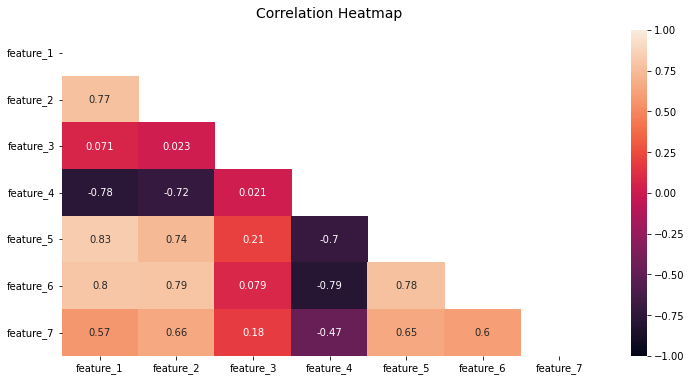

In [ ]:
plt.figure(figsize=(12, 6))

mask = np.triu(np.ones_like(x_train_autoenc.corr("kendall"), dtype=bool))
heatmap=sns.heatmap(x_train_autoenc.corr("kendall"), mask=mask, vmin=-1, vmax=1,annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(x_train_autoenc, y_train)

lin_reg_dev = lin_reg.predict(x_train_autoenc)
lin_reg_pred = lin_reg.predict(x_test_autoenc)

# Train set RMSE
train_rmse = mean_squared_error(y_train, lin_reg_dev, squared=False)
print(f'Train RMSE: {train_rmse}')

# Test set RMSE
test_rmse = mean_squared_error(y_test, lin_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

Train RMSE: 2.2430595552369588
Test RMSE: 2.3027464720207824


In [ ]:
x_train_autoenc.to_csv('/content/x_train_autoenc.csv', encoding="utf-8")
x_test_autoenc.to_csv('/content/x_test_autoenc.csv', encoding="utf-8")

## 2.2.3.7. AE 3 (Vanilla Autoencoder-encoder+bottleneck+decoder and constraints)

In [ ]:
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model
import keras.backend as K

In [ ]:
x_train_autoenc=x_train_num_yj
x_test_autoenc=x_test_num_yj
nb_epoch=20

In [ ]:
## define the encoder
tf.random.set_seed(31)
inputs_dim = x_train_autoenc.shape[1]
encoder = Dense(7, activation = "linear", input_shape=(input_dim,), use_bias = True,
                activity_regularizer=UncorrelatedFeaturesConstraint(7, weightage=1.),kernel_regularizer=WeightsOrthogonalityConstraint(7, weightage=1., axis=0), kernel_constraint=UnitNorm(axis=0))

## bottleneck layer
n_bottleneck = 5
## defining it with a name to extract it later
bottleneck_layer = "bottleneck_layer"
# can also be defined with an activation function, relu for instance
bottleneck = DenseTied(n_bottleneck, name = bottleneck_layer, tied_to=encoder, use_bias = False)
## define the decoder (in reverse)
decoder = DenseTied(7, activation = "linear", tied_to=bottleneck, use_bias = False)
## output layer

autoencoder.build(x_train_autoenc.shape)
autoencoder = Sequential()
autoencoder.add(encoder)
autoencoder.add(bottleneck)
autoencoder.add(decoder)

## model
autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='sgd')


autoencoder.fit(x_train_autoenc,x_train_autoenc,
                epochs=nb_epoch,
                batch_size=batch_size,
                shuffle=True,
                verbose=1)

autoencoder.summary()

Epoch 1/20
209/209 [==============================] - 1s 2ms/step - loss: 2.5335 - accuracy: 0.1676
Epoch 2/20
209/209 [==============================] - 0s 2ms/step - loss: 2.1384 - accuracy: 0.1862
Epoch 3/20
209/209 [==============================] - 0s 2ms/step - loss: 2.1037 - accuracy: 0.1972
Epoch 4/20
209/209 [==============================] - 0s 2ms/step - loss: 2.0858 - accuracy: 0.2101
Epoch 5/20
209/209 [==============================] - 0s 2ms/step - loss: 2.0768 - accuracy: 0.2194
Epoch 6/20
209/209 [==============================] - 0s 2ms/step - loss: 2.0690 - accuracy: 0.2290
Epoch 7/20
209/209 [==============================] - 0s 2ms/step - loss: 2.0619 - accuracy: 0.2377
Epoch 8/20
209/209 [==============================] - 0s 2ms/step - loss: 2.0564 - accuracy: 0.2454
Epoch 9/20
209/209 [==============================] - 0s 2ms/step - loss: 2.0501 - accuracy: 0.2529
Epoch 10/20
209/209 [==============================] - 0s 2ms/step - loss: 2.0455 - accuracy: 0.2574

In [ ]:
train_predictions = autoencoder.predict(x_train_autoenc)
print('Train reconstrunction error\n', sklearn.metrics.mean_squared_error(x_train_autoenc, train_predictions))
test_predictions = autoencoder.predict(x_test_autoenc)
print('Test reconstrunction error\n', sklearn.metrics.mean_squared_error(x_test_autoenc, test_predictions))

Train reconstrunction error
 0.9470557458136467
Test reconstrunction error
 0.9480938300750711


In [ ]:
x_train_autoenc = pd.DataFrame(train_predictions,columns=["feature_1","feature_2","feature_3","feature_4","feature_5","feature_6","feature_7"])
x_test_autoenc =pd.DataFrame(test_predictions,columns=["feature_1","feature_2","feature_3","feature_4","feature_5","feature_6","feature_7"])

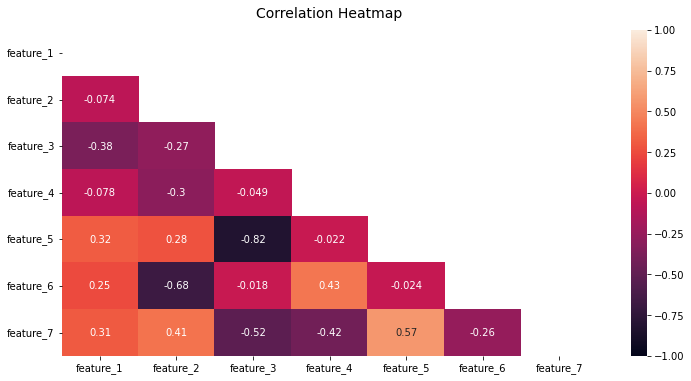

In [ ]:
plt.figure(figsize=(12, 6))

mask = np.triu(np.ones_like(x_train_autoenc.corr("kendall"), dtype=bool))
heatmap=sns.heatmap(x_train_autoenc.corr("kendall"), mask=mask, vmin=-1, vmax=1,annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(x_train_autoenc, y_train)

lin_reg_dev = lin_reg.predict(x_train_autoenc)
lin_reg_pred = lin_reg.predict(x_test_autoenc)

# Train set RMSE
train_rmse = mean_squared_error(y_train, lin_reg_dev, squared=False)
print(f'Train RMSE: {train_rmse}')

# Test set RMSE
test_rmse = mean_squared_error(y_test, lin_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

Train RMSE: 2.178764499556732
Test RMSE: 2.2367942677671753


In [ ]:
w_encoder = np.round(autoencoder.layers[0].get_weights()[0], 2).T  # W in Figure 2.
w_decoder = np.round(autoencoder.layers[1].get_weights()[0], 2)  # W' in Figure 2.
print('Encoder weights \n', w_encoder)
print('Decoder weights \n', w_decoder)

Encoder weights 
 [[ 0.62 -0.34  0.07 -0.15  0.52 -0.39 -0.23]
 [ 0.38  0.06  0.23  0.36 -0.44 -0.65  0.23]
 [-0.29  0.65  0.43 -0.33 -0.04 -0.44 -0.11]
 [ 0.04 -0.01  0.09  0.62 -0.36  0.15 -0.68]
 [ 0.48  0.58 -0.21 -0.3  -0.    0.22 -0.5 ]
 [-0.12 -0.3   0.86 -0.12  0.12  0.24 -0.26]
 [ 0.41 -0.16  0.18 -0.45 -0.63  0.33  0.25]]
Decoder weights 
 [[ 0.62  0.38 -0.29  0.04  0.48 -0.12  0.41]
 [-0.34  0.06  0.65 -0.01  0.58 -0.3  -0.16]
 [ 0.07  0.23  0.43  0.09 -0.21  0.86  0.18]
 [-0.15  0.36 -0.33  0.62 -0.3  -0.12 -0.45]
 [ 0.52 -0.44 -0.04 -0.36 -0.    0.12 -0.63]
 [-0.39 -0.65 -0.44  0.15  0.22  0.24  0.33]
 [-0.23  0.23 -0.11 -0.68 -0.5  -0.26  0.25]]


In [ ]:
np.round(np.dot(w_encoder, w_encoder.T), 3)

array([[ 1.003,  0.149, -0.145, -0.148,  0.16 ,  0.134, -0.125],
       [ 0.149,  1.   ,  0.187,  0.163, -0.197, -0.178,  0.146],
       [-0.145,  0.187,  1.008, -0.161,  0.205,  0.167, -0.144],
       [-0.148,  0.163, -0.161,  1.009,  0.182,  0.171, -0.138],
       [ 0.16 , -0.197,  0.205,  0.182,  0.999, -0.193,  0.149],
       [ 0.134, -0.178,  0.167,  0.171, -0.193,  0.998,  0.146],
       [-0.125,  0.146, -0.144, -0.138,  0.149,  0.146,  0.997]],
      dtype=float32)

In [ ]:
print('Encoder weights norm, \n', np.sum(w_encoder ** 2, axis = 1))
print('Decoder weights norm, \n', np.sum(w_decoder ** 2, axis = 1))

Encoder weights norm, 
 [1.0027999  0.9995     1.0077     1.0087     0.99929994 0.998
 0.9969    ]
Decoder weights norm, 
 [1.0274     0.9938     1.0669     0.9523001  1.0065     1.0056
 0.96040004]


## 2.2.3.8. AE 4 (Vanilla Autoencoder-encoder+bottleneck+decoder and constraints)

In [ ]:
## define the encoder
tf.random.set_seed(31)
inputs_dim = x_train_autoenc.shape[1]
encoder = Dense(7, activation = "linear", input_shape=(input_dim,))

## bottleneck layer
n_bottleneck = 5
## defining it with a name to extract it later
bottleneck_layer = "bottleneck_layer"
# can also be defined with an activation function, relu for instance
bottleneck = Dense(n_bottleneck, name = bottleneck_layer,  use_bias = True,
                activity_regularizer=UncorrelatedFeaturesConstraint(5, weightage=1.),kernel_regularizer=WeightsOrthogonalityConstraint(5, weightage=1., axis=0), kernel_constraint=UnitNorm(axis=0))
## define the decoder (in reverse)
decoder = DenseTied(7, activation = "linear", tied_to=bottleneck, use_bias = False)
## output layer

autoencoder.build(x_train_autoenc.shape)
autoencoder = Sequential()
autoencoder.add(encoder)
autoencoder.add(bottleneck)
autoencoder.add(decoder)

## model
autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='sgd')


autoencoder.fit(x_train_autoenc,x_train_autoenc,
                epochs=nb_epoch,
                batch_size=batch_size,
                shuffle=True,
                verbose=1)

autoencoder.summary()

Epoch 1/20
  4/209 [..............................] - ETA: 4s - loss: 3.0459 - accuracy: 0.0625    

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


209/209 [==============================] - 5s 26ms/step - loss: 1.1622 - accuracy: 0.1856
Epoch 2/20
209/209 [==============================] - 6s 28ms/step - loss: 0.7958 - accuracy: 0.2017
Epoch 3/20
209/209 [==============================] - 5s 24ms/step - loss: 0.7898 - accuracy: 0.2083
Epoch 4/20
209/209 [==============================] - 5s 22ms/step - loss: 0.7857 - accuracy: 0.2158
Epoch 5/20
209/209 [==============================] - 5s 23ms/step - loss: 0.7818 - accuracy: 0.2290
Epoch 6/20
209/209 [==============================] - 5s 23ms/step - loss: 0.7770 - accuracy: 0.2326
Epoch 7/20
209/209 [==============================] - 5s 22ms/step - loss: 0.7752 - accuracy: 0.2400
Epoch 8/20
209/209 [==============================] - 5s 23ms/step - loss: 0.7742 - accuracy: 0.2496
Epoch 9/20
209/209 [==============================] - 5s 23ms/step - loss: 0.7718 - accuracy: 0.2592
Epoch 10/20
209/209 [==============================] - 5s 23ms/step - loss: 0.7712 - accuracy: 0.2628


In [ ]:
train_predictions = autoencoder.predict(x_train_autoenc)
print('Train reconstrunction error\n', sklearn.metrics.mean_squared_error(x_train_autoenc, train_predictions))
test_predictions = autoencoder.predict(x_test_autoenc)
print('Test reconstrunction error\n', sklearn.metrics.mean_squared_error(x_test_autoenc, test_predictions))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Train reconstrunction error
 0.6880818235586676


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Test reconstrunction error
 0.688253492675552


In [ ]:
x_train_autoenc = pd.DataFrame(train_predictions,columns=["feature_1","feature_2","feature_3","feature_4","feature_5","feature_6","feature_7"])
x_test_autoenc =pd.DataFrame(test_predictions,columns=["feature_1","feature_2","feature_3","feature_4","feature_5","feature_6","feature_7"])

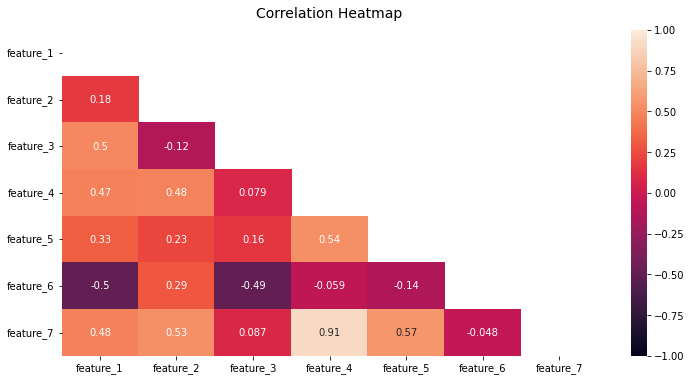

In [ ]:
plt.figure(figsize=(12, 6))

mask = np.triu(np.ones_like(x_train_autoenc.corr("kendall"), dtype=bool))
heatmap=sns.heatmap(x_train_autoenc.corr("kendall"), mask=mask, vmin=-1, vmax=1,annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(x_train_autoenc, y_train)

lin_reg_dev = lin_reg.predict(x_train_autoenc)
lin_reg_pred = lin_reg.predict(x_test_autoenc)

# Train set RMSE
train_rmse = mean_squared_error(y_train, lin_reg_dev, squared=False)
print(f'Train RMSE: {train_rmse}')

# Test set RMSE
test_rmse = mean_squared_error(y_test, lin_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

Train RMSE: 2.217958993366055
Test RMSE: 2.284636713661574


In [ ]:
w_encoder = np.round(autoencoder.layers[0].get_weights()[0], 2).T  # W in Figure 2.
w_decoder = np.round(autoencoder.layers[1].get_weights()[0], 2)  # W' in Figure 2.
print('Encoder weights \n', w_encoder)
print('Decoder weights \n', w_decoder)

Encoder weights 
 [[ 0.57 -0.34  0.52  0.08  0.2  -0.4  -0.2 ]
 [ 0.31 -0.15 -0.65  0.29 -0.57  0.19  0.37]
 [-0.62  0.43  0.24  0.12  0.34 -0.46  0.11]
 [-0.37 -0.4  -0.55  0.74  0.14  0.49 -0.08]
 [ 0.31  0.13 -0.19 -0.19 -0.06  0.47 -0.33]
 [-0.21  0.09  0.48 -0.03  0.19  0.32 -0.51]
 [ 0.4   0.32  0.5  -0.42  0.01 -0.3   0.3 ]]
Decoder weights 
 [[ 0.51 -0.01  0.17 -0.54 -0.38]
 [-0.22  0.5   0.62 -0.29  0.06]
 [ 0.6   0.49 -0.29  0.12 -0.22]
 [ 0.5  -0.25  0.13  0.27  0.51]
 [-0.06  0.3  -0.51 -0.53  0.59]
 [-0.11  0.59 -0.06  0.5  -0.04]
 [ 0.27  0.12  0.47  0.07  0.44]]


In [ ]:
np.round(np.dot(w_encoder, w_encoder.T), 3)

array([[ 0.957, -0.351, -0.135, -0.454, -0.115,  0.109,  0.408],
       [-0.351,  1.123, -0.618,  0.501,  0.146, -0.635, -0.322],
       [-0.135, -0.618,  0.981, -0.172, -0.478,  0.142,  0.134],
       [-0.454,  0.501, -0.172,  1.413,  0.046, -0.02 , -1.031],
       [-0.115,  0.146, -0.478,  0.046,  0.519,  0.168, -0.09 ],
       [ 0.109, -0.635,  0.142, -0.02 ,  0.168,  0.682, -0.05 ],
       [ 0.408, -0.322,  0.134, -1.031, -0.09 , -0.05 ,  0.869]],
      dtype=float32)

In [ ]:
print('Encoder weights norm, \n', np.sum(w_encoder ** 2, axis = 1))
print('Decoder weights norm, \n', np.sum(w_decoder ** 2, axis = 1))

Encoder weights norm, 
 [0.95730007 1.1231     0.9806     1.4131001  0.5186     0.68209994
 0.86890006]
Decoder weights norm, 
 [0.7251     0.7705     0.74700004 0.6624     0.9826999  0.6154
 0.50670004]


## 2.2.3.9. VAE 1 (Variational Autoencoder-on the original numeric data)

In [ ]:
# Setup the network parameters:
from keras.layers import Lambda, Input, Dense
from keras.losses import mse, binary_crossentropy
from keras.utils.vis_utils import plot_model
from keras import losses
from keras.models import Model

In [ ]:
# Setup the network parameters:
from keras.layers import Lambda, Input, Dense
from keras.losses import mse, binary_crossentropy
from keras.utils.vis_utils import plot_model
from keras import losses
from keras.models import Model

In [ ]:
x_train_autoenc=x_train[x_num]
x_test_autoenc=x_test[x_num]

In [ ]:
# Setup the network parameters:
from keras.layers import Lambda, Input, Dense
from keras.losses import mse, binary_crossentropy
from keras.utils.vis_utils import plot_model
from keras import losses
from keras.models import Model

original_dim = x_train_autoenc.shape[1]
input_shape = (original_dim, )
intermediate_dim = 6
batch_size = 16
latent_dim = 5
epochs = 15

# Map inputs to the latent distribution parameters:
# VAE model = encoder + decoder
# build encoder model
inputs = Input(shape=input_shape, name='encoder_input')
x = Dense(intermediate_dim, activation='relu')(inputs)
z_mean = Dense(latent_dim, name='z_mean')(x)
z_log_var = Dense(latent_dim, name='z_log_var')(x)

# Use those parameters to sample new points from the latent space:
# reparameterization trick
# instead of sampling from Q(z|X), sample epsilon = N(0,I)
# z = z_mean + sqrt(var) * epsilon
def sampling(args):
    """Reparameterization trick by sampling from an isotropic unit Gaussian.
    # Arguments
        args (tensor): mean and log of variance of Q(z|X)
    # Returns
        z (tensor): sampled latent vector
    """

    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    # by default, random_normal has mean = 0 and std = 1.0
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon
  
# use reparameterization trick to push the sampling out as input
# note that "output_shape" isn't necessary with the TensorFlow backend
z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])

# Instantiate the encoder model:
encoder = Model(inputs, z_mean)

# Build the decoder model:
latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
x = Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = Dense(original_dim, activation='sigmoid')(x)

# Instantiate the decoder model:
decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()

# Instantiate the VAE model:
outputs = decoder(encoder(inputs))
vae = Model(inputs, outputs, name='vae_mlp')

# As in the Keras tutorial, we define a custom loss function:

def xent_loss(x, x_decoded_mean):
    xent_loss = losses.binary_crossentropy(x, x_decoded_mean)
    return K.sum(xent_loss, axis=-1)

def kl_loss(z_mean, z_log_sigma):
    return - 0.5 * K.mean(1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma))
  
# We compile the model:
vae.compile(optimizer='rmsprop',  loss=[xent_loss, kl_loss], loss_weights=[1.,1.])

# Finally, we train the model:
results = vae.fit(x_train_autoenc, x_train_autoenc,
        shuffle=True,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_test_autoenc, x_test_autoenc))

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 z_sampling (InputLayer)     [(None, 5)]               0         
                                                                 
 dense_49 (Dense)            (None, 6)                 36        
                                                                 
 dense_50 (Dense)            (None, 7)                 49        
                                                                 
Total params: 85
Trainable params: 85
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
209/209 [==============================] - 2s 4ms/step - loss: 10.2851 - val_loss: 9.3304
Epoch 2/15
209/209 [==============================] - 1s 3ms/step - loss: 8.9136 - val_loss: 8.6532
Epoch 3/15
209/209 [==============================] - 1s 3ms/step - loss: 8.3170 - val_loss: 7.9283
Epoch 4/15
209/209 [======

In [ ]:
train_predictions = vae.predict(x_train_autoenc)
print('Train reconstrunction error\n', sklearn.metrics.mean_squared_error(x_train_autoenc, train_predictions))
test_predictions = vae.predict(x_test_autoenc)
print('Test reconstrunction error\n', sklearn.metrics.mean_squared_error(x_test_autoenc, test_predictions))

Train reconstrunction error
 0.027745540908535822
Test reconstrunction error
 0.02843869769387077


In [ ]:
x_train_autoenc = pd.DataFrame(train_predictions,columns=["feature_1","feature_2","feature_3","feature_4","feature_5","feature_6","feature_7"])
x_test_autoenc =pd.DataFrame(test_predictions,columns=["feature_1","feature_2","feature_3","feature_4","feature_5","feature_6","feature_7"])

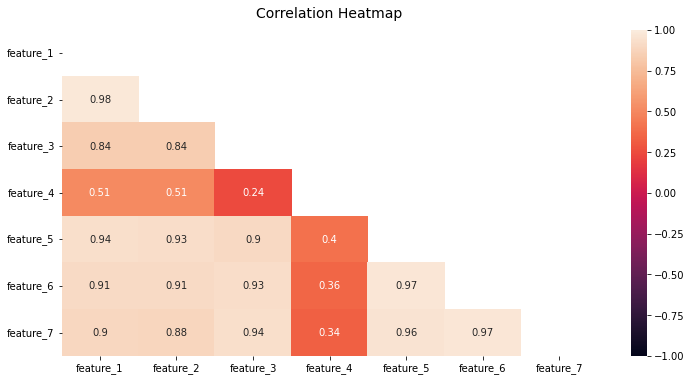

In [ ]:
plt.figure(figsize=(12, 6))

mask = np.triu(np.ones_like(x_train_autoenc.corr("kendall"), dtype=bool))
heatmap=sns.heatmap(x_train_autoenc.corr("kendall"), mask=mask, vmin=-1, vmax=1,annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(x_train_autoenc, y_train)

lin_reg_dev = lin_reg.predict(x_train_autoenc)
lin_reg_pred = lin_reg.predict(x_test_autoenc)

# Train set RMSE
train_rmse = mean_squared_error(y_train, lin_reg_dev, squared=False)
print(f'Train RMSE: {train_rmse}')

# Test set RMSE
test_rmse = mean_squared_error(y_test, lin_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

Train RMSE: 2.327945550739274
Test RMSE: 2.389145156132424


## 2.2.3.10. VAE 2 (Variational Autoencoder-on the original numeric data)

In [ ]:
x_train_autoenc=x_train[x_num]
x_test_autoenc=x_test[x_num]

In [ ]:
# Setup the network parameters:
from keras.layers import Lambda, Input, Dense
from keras.losses import mse, binary_crossentropy
from keras.utils.vis_utils import plot_model
from keras import losses
from keras.models import Model

original_dim = x_train_autoenc.shape[1]
input_shape = (original_dim, )
intermediate_dim = 6
batch_size = 16
latent_dim = 5
epochs = 20

# Map inputs to the latent distribution parameters:
# VAE model = encoder + decoder
# build encoder model
inputs = Input(shape=input_shape, name='encoder_input')
x = Dense(intermediate_dim, activation='relu')(inputs)
z_mean = Dense(latent_dim, name='z_mean')(x)
z_log_var = Dense(latent_dim, name='z_log_var')(x)

# Use those parameters to sample new points from the latent space:
# reparameterization trick
# instead of sampling from Q(z|X), sample epsilon = N(0,I)
# z = z_mean + sqrt(var) * epsilon
def sampling(args):
    """Reparameterization trick by sampling from an isotropic unit Gaussian.
    # Arguments
        args (tensor): mean and log of variance of Q(z|X)
    # Returns
        z (tensor): sampled latent vector
    """

    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    # by default, random_normal has mean = 0 and std = 1.0
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon
  
# use reparameterization trick to push the sampling out as input
# note that "output_shape" isn't necessary with the TensorFlow backend
z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])

# Instantiate the encoder model:
encoder = Model(inputs, z_mean)

# Build the decoder model:
latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
x = Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = Dense(original_dim, activation='sigmoid')(x)

# Instantiate the decoder model:
decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()

# Instantiate the VAE model:
outputs = decoder(encoder(inputs))
vae = Model(inputs, outputs, name='vae_mlp')

# As in the Keras tutorial, we define a custom loss function:

def xent_loss(x, x_decoded_mean):
    xent_loss = losses.binary_crossentropy(x, x_decoded_mean)
    return K.sum(xent_loss, axis=-1)

def kl_loss(z_mean, z_log_sigma):
    return - 0.5 * K.mean(1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma))
  
# We compile the model:
vae.compile(optimizer='rmsprop',  loss=[xent_loss, kl_loss], loss_weights=[1.,1.])

# Finally, we train the model:
results = vae.fit(x_train_autoenc, x_train_autoenc,
        shuffle=True,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_test_autoenc, x_test_autoenc))

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 z_sampling (InputLayer)     [(None, 5)]               0         
                                                                 
 dense_130 (Dense)           (None, 6)                 36        
                                                                 
 dense_131 (Dense)           (None, 7)                 49        
                                                                 
Total params: 85
Trainable params: 85
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
209/209 [==============================] - 1s 3ms/step - loss: 10.1185 - val_loss: 9.1325
Epoch 2/20
209/209 [==============================] - 0s 2ms/step - loss: 7.8248 - val_loss: 6.2378
Epoch 3/20
209/209 [==============================] - 0s 2ms/step - loss: 4.2013 - val_loss: 1.6802
Epoch 4/20
209/209 [======

In [ ]:
train_predictions = vae.predict(x_train_autoenc)
print('Train reconstrunction error\n', sklearn.metrics.mean_squared_error(x_train_autoenc, train_predictions))
test_predictions = vae.predict(x_test_autoenc)
print('Test reconstrunction error\n', sklearn.metrics.mean_squared_error(x_test_autoenc, test_predictions))

Train reconstrunction error
 0.03372673584673991
Test reconstrunction error
 0.0340855823255139


In [ ]:
x_train_autoenc = pd.DataFrame(train_predictions,columns=["feature_1","feature_2","feature_3","feature_4","feature_5","feature_6","feature_7"])
x_test_autoenc =pd.DataFrame(test_predictions,columns=["feature_1","feature_2","feature_3","feature_4","feature_5","feature_6","feature_7"])

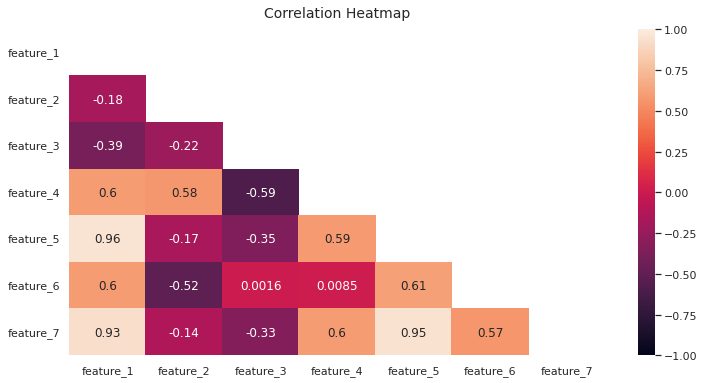

In [ ]:
plt.figure(figsize=(12, 6))

mask = np.triu(np.ones_like(x_train_autoenc.corr("kendall"), dtype=bool))
heatmap=sns.heatmap(x_train_autoenc.corr("kendall"), mask=mask, vmin=-1, vmax=1,annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(x_train_autoenc, y_train)

lin_reg_dev = lin_reg.predict(x_train_autoenc)
lin_reg_pred = lin_reg.predict(x_test_autoenc)

# Train set RMSE
train_rmse = mean_squared_error(y_train, lin_reg_dev, squared=False)
print(f'Train RMSE: {train_rmse}')

# Test set RMSE
test_rmse = mean_squared_error(y_test, lin_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

Train RMSE: 2.6328246427283615
Test RMSE: 2.7547303750061567


### 2.2.4. Encompassing the final samples

In [ ]:
x_train_cat=x_train[["sex_F","sex_I","sex_M"]].reset_index(drop=True, inplace=False)
x_test_cat=x_test[["sex_F","sex_I","sex_M"]].reset_index(drop=True, inplace=False)

x_train_pc=x_train_pc.reset_index(drop=True, inplace=False)
x_test_pc=x_test_pc.reset_index(drop=True, inplace=False)

x_train_reg=pd.concat([x_train_pc,x_train_cat],axis=1)
x_test_reg=pd.concat([x_test_pc,x_test_cat],axis=1)

x_train_after_kpca=x_train_after_kpca.reset_index(drop=True, inplace=False)
x_test_after_kpca=x_test_after_kpca.reset_index(drop=True, inplace=False)

x_train_reg_3=pd.concat([x_train_after_kpca,x_train_cat],axis=1)
x_test_reg_3=pd.concat([x_test_after_kpca,x_test_cat],axis=1)

In [ ]:
#Train-test split of the original data (no feature engineering besides one-hot-encoding of the categorical variables)
x_train.to_csv('/content/x_train.csv', encoding="utf-8")
x_test.to_csv('/content/x_test.csv', encoding="utf-8")

#Final data after feature engineering
x_train_reg.to_csv('/content/x_train_reg.csv', encoding="utf-8")
x_test_reg.to_csv('/content/x_test_reg.csv', encoding="utf-8")

x_train_reg_3.to_csv('/content/x_train_reg_3.csv', encoding="utf-8")
x_test_reg_3.to_csv('/content/x_test_reg_3.csv', encoding="utf-8")

y_train.to_csv('/content/y_train.csv', encoding="utf-8")
y_test.to_csv('/content/y_test.csv', encoding="utf-8")

## 3. Model Building (Baseline Test Performance)¶
Before going further, I wanted to see how various different models perform with default parameters. I tried to assess each of the model's perormance to get a baseline. With the baseline, we can see how much tuning improves each of the models. 

The baseline model performance (in terms of RMSE) can be found in the table below:

| Baseline Model | Train RMSE | Test RMSE |
| --- | --- | --- |
    | Benchmark Model 1: Multiple Linear Regression (before Yeo-Johnson transform) | 2.17 | 2.20|
    | Benchmark Model 2: Multiple Linear Regression (before Yeo-Johnson transform using length and height) | 2.55 | 2.60 |
    | Benchmark Model 3: Multiple Linear Regression (before Yeo-Johnson transform using length, diameter, height and whole_weight) |2.52 | 2.60 |
    | Benchmark Model 4: Multiple Linear Regression (after Yeo-Johnson transform) | 2.18 | 2.24 |
    |Benchmark Model 5: Multiple Linear Regression (after Yeo-Johnson transform using length, diameter, height and whole_weight) | 2.53 | 2.61 |
    | Baseline Multiple Linear Regression (after PCA) | 2.21 | 2.29 |
    | Baseline Linear Regression with Interactions (before Yeo-Johnson transform) | 2.07 | 2.17 |
    | Baseline Decision Tree Regressor (after PCA)| 0.0 | 3.07 |
    | Baseline Decision Tree Regressor (before Yeo-Johnson transform)| 0.0 | 2.96 |
    | Baseline Random Forest Regressor (after PCA)| 0.81 | 2.28  |
    | Baseline Random Forest Regressor (before Yeo-Johnson transform)| 0.80 | 2.24  |
    | Baseline Bagging Regressor (after PCA)| 0.99 | 2.38  |
    | Baseline Bagging Regressor (before Yeo-Johnson transform)| 0.94 | 2.28  |
    | Baseline Ada Boost Regressor (after PCA)| 2.65 | 2.81  |
    | Baseline Ada Boost Regressor (before Yeo-Johnson transform)| 2.79 | 2.92  |
    | Baseline Gradient Boosting Regressor (after PCA)| 1.90 | 2.21  |
    | Baseline Gradient Boosting Regressor (before Yeo-Johnson transform)| 1.87 | 2.17  |
    | Baseline Light Gradient Boosting Regressor (after PCA)| 1.49 | 2.28  |
    |Baseline Light Gradient Boosting Regressor (before Yeo-Johnson transform)| 1.49 | 2.25  |
    | Baseline Extreme Gradient Boosting Regressor (after PCA)| 1.92 | 2.21  |
    | Baseline Extreme Gradient Boosting Regressor (before Yeo-Johnson transform)| 1.88 | 2.19  |
    | Baseline Multi-Layer Perceptron Regressor 1 hidden layer, 5 nodes (after PCA, with standardization)| 2.12 | 2.22  |
    |Baseline Multi-Layer Perceptron Regressor 1 hidden layer, 8 nodes (before Yeo-Johnson transform)| 2.15 | 2.19  |
    | Baseline Multi-Layer Perceptron Regressor  1 hidden layer, 5 nodes (after PCA, with normalization)| 2.21 | 2.28  |
    | Baseline Multi-Layer Perceptron Regressor 1 hidden layer, 8 nodes (before Yeo-Johnson transform, with normalization|  5.28 | 5.19   |
    | Baseline Multi-Layer Perceptron Regressor 2 hidden layers, 8 and 4 nodes (before Yeo-Johnson transform)| 2.11 | 2.14  |
    | Baseline Multi-Layer Perceptron Regressor 3 hidden layers, 8, 4 and 2 nodes (before Yeo-Johnson transform)| 2.09 | 2.11  |
    | Baseline Voting Regressor (after PCA)| 1.67 | 2.21  |
    | Baseline Voting Regressor (before Yeo-Johnson transform)| 1.64 | 2.14 |
        | Baseline Multiple Linear Regression (after Kernel PCA)| 2.15 |2.46   |
    | Baseline Gradient Boosting Regressor (after Kernel PCA)|1.84 | 2.12  |
    | Baseline Light Gradient Boosting Regressor (after Kernel PCA)| 1.38 | 2.17  |
    | Baseline Extreme Gradient Boosting Regressor (after Kernel PCA)|1.86  |2.09   |
    | Baseline Multi-Layer Perceptron Regressor 1 hidden layer, 8 nodes (after Kernel PCA)|2.14 | 2.19 |
    | Baseline Multi-Layer Perceptron Regressor 2 hidden layers, 8 and 4 nodes (after Kernel PCA)|2.09 | 2.12 |
    |Baseline Multi-Layer Perceptron Regressor 3 hidden layers, 8, 4 and 2 nodes (after Kernel PCA)|2.10 | 2.13 |






 




















In [ ]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

#!pip install shap
import shap


from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.neural_network import MLPRegressor
from  sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor



pd.set_option('display.max_columns', 100)

In [ ]:
x_train = pd.read_csv(r'/content/x_train.csv')
x_test = pd.read_csv(r'/content/x_test.csv')
x_train_reg = pd.read_csv(r'/content/x_train_reg.csv')
x_test_reg = pd.read_csv(r'/content/x_test_reg.csv')
x_train_reg_3 = pd.read_csv(r'/content/x_train_reg_3.csv')
x_test_reg_3 = pd.read_csv(r'/content/x_test_reg_3.csv')
y_train = pd.read_csv(r'/content/y_train.csv')
y_test = pd.read_csv(r'/content/y_test.csv')

In [ ]:
x_train.drop("Unnamed: 0",axis=1,inplace=True)
x_test.drop("Unnamed: 0",axis=1,inplace=True)
x_train_reg.drop("Unnamed: 0",axis=1,inplace=True)
x_test_reg.drop("Unnamed: 0",axis=1,inplace=True)
x_train_reg_3.drop("Unnamed: 0",axis=1,inplace=True)
x_test_reg_3.drop("Unnamed: 0",axis=1,inplace=True)
y_train.drop("Unnamed: 0",axis=1,inplace=True)
y_test.drop("Unnamed: 0",axis=1,inplace=True)

### Benchmark Model 1: Multiple Linear Regression (before Yeo-Johnson transform)

In [ ]:
x_train_benchmark = x_train
x_test_benchmark = x_test

lin_reg_orig = LinearRegression()
lin_reg_orig.fit(x_train_benchmark, y_train)

lin_reg_dev = lin_reg_orig.predict(x_train_benchmark)
lin_reg_pred = lin_reg_orig.predict(x_test_benchmark)

# Train set RMSE
train_rmse = mean_squared_error(y_train, lin_reg_dev, squared=False)
print(f'Train RMSE: {train_rmse}')

# Test set RMSE
test_rmse = mean_squared_error(y_test, lin_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

Train RMSE: 2.168511969693928
Test RMSE: 2.2045871271780815


In [ ]:
plotfit = LinearRegression()
plotfit.fit(y_train.to_numpy().reshape(-1,1),lin_reg_dev)
residual = lin_reg_dev - plotfit.predict(y_train.to_numpy().reshape(-1,1))


[Text(0, 0.5, 'residuals'), Text(0.5, 0, 'fitted values')]

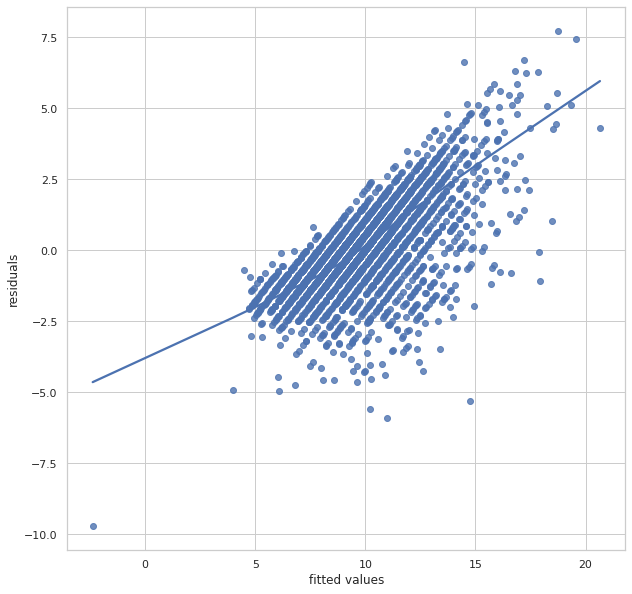

In [ ]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize =(10,10))
sns.regplot(x=lin_reg_dev,y=residual,ax=ax,lowess=True)
ax.set(ylabel='residuals',xlabel='fitted values')

### Benchmark Model 2: Multiple Linear Regression (before Yeo-Johnson transform using length and height)


In [ ]:
x_train_benchmark = x_train[['length', 'height']]
x_test_benchmark = x_test[['length', 'height']]

lin_reg = LinearRegression()
lin_reg.fit(x_train_benchmark, y_train)

lin_reg_dev = lin_reg.predict(x_train_benchmark)
lin_reg_pred = lin_reg.predict(x_test_benchmark)

# Train set RMSE
train_rmse = mean_squared_error(y_train, lin_reg_dev, squared=False)
print(f'Train RMSE: {train_rmse}')

# Test set RMSE
test_rmse = mean_squared_error(y_test, lin_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

Train RMSE: 2.545995889024702
Test RMSE: 2.604674336821556


### Benchmark Model 3: Multiple Linear Regression (before Yeo-Johnson transform using length, diameter, height and whole_weight)

In [ ]:
x_train_benchmark = x_train[["length","diameter","height", "whole_weight"]]
x_test_benchmark = x_test[["length","diameter","height", "whole_weight"]]

lin_reg = LinearRegression()
lin_reg.fit(x_train_benchmark, y_train)

lin_reg_dev = lin_reg.predict(x_train_benchmark)
lin_reg_pred = lin_reg.predict(x_test_benchmark)

# Train set RMSE
train_rmse = mean_squared_error(y_train, lin_reg_dev, squared=False)
print(f'Train RMSE: {train_rmse}')

# Test set RMSE
test_rmse = mean_squared_error(y_test, lin_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

Train RMSE: 2.5210291743322535
Test RMSE: 2.598631386479427


### Benchmark Model 4: Multiple Linear Regression (after Yeo-Johnson transform)

In [ ]:
x_train_benchmark = x_train_num_yj
x_test_benchmark = x_test_num_yj

lin_reg = LinearRegression()
lin_reg.fit(x_train_benchmark, y_train)

lin_reg_dev = lin_reg.predict(x_train_benchmark)
lin_reg_pred = lin_reg.predict(x_test_benchmark)

# Train set RMSE
train_rmse = mean_squared_error(y_train, lin_reg_dev, squared=False)
print(f'Train RMSE: {train_rmse}')

# Test set RMSE
test_rmse = mean_squared_error(y_test, lin_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

Train RMSE: 2.1787645322355336
Test RMSE: 2.2367942233358065


### Benchmark Model 5: Multiple Linear Regression (after Yeo-Johnson transform using length, diameter, height and whole_weight)

In [ ]:
x_train_benchmark = x_train_num_yj[["length","diameter","height", "whole_weight"]]
x_test_benchmark = x_test_num_yj[["length","diameter","height", "whole_weight"]]

lin_reg = LinearRegression()
lin_reg.fit(x_train_benchmark, y_train)

lin_reg_dev = lin_reg.predict(x_train_benchmark)
lin_reg_pred = lin_reg.predict(x_test_benchmark)

# Train set RMSE
train_rmse = mean_squared_error(y_train, lin_reg_dev, squared=False)
print(f'Train RMSE: {train_rmse}')

# Test set RMSE
test_rmse = mean_squared_error(y_test, lin_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

Train RMSE: 2.531549634386819
Test RMSE: 2.61369284480094


### Baseline Multiple Linear Regression (after PCA)

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(x_train_reg, y_train)

lin_reg_dev = lin_reg.predict(x_train_reg)
lin_reg_pred = lin_reg.predict(x_test_reg)

# Train set RMSE
train_rmse = mean_squared_error(y_train, lin_reg_dev, squared=False)
print(f'Train RMSE: {train_rmse}')

# Test set RMSE
test_rmse = mean_squared_error(y_test, lin_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

Train RMSE: 2.206505073850102
Test RMSE: 2.290349657656608


### Baseline Linear Regression with Interactions (before Yeo-Johnson transform)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import scipy.special
poly = PolynomialFeatures(interaction_only=True)
X_tr = poly.fit_transform(x_train)
x_train.reset_index(drop=True, inplace=True)
X_train_w_inter = pd.concat([x_train,pd.DataFrame(X_tr,columns=poly.get_feature_names_out()).drop(['1', 'length', 'diameter', 'height', 'whole_weight',
       'shucked_weight', 'viscera_weight', 'shell_weight', 'sex_F',
       'sex_I', 'sex_M'],1)],1)

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only


In [ ]:
X_ts = poly.transform(x_test)
x_test.reset_index(drop=True, inplace=True)
X_test_w_inter = pd.concat([x_test,pd.DataFrame(X_ts,columns=poly.get_feature_names_out()).drop(['1', 'length', 'diameter', 'height', 'whole_weight',
       'shucked_weight', 'viscera_weight', 'shell_weight', 'sex_F',
       'sex_I', 'sex_M'],1)],1)

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only


In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_w_inter, y_train)

lin_reg_dev = lin_reg.predict(X_train_w_inter)
lin_reg_pred = lin_reg.predict(X_test_w_inter)

# Train set RMSE
train_rmse = mean_squared_error(y_train, lin_reg_dev, squared=False)
print(f'Train RMSE: {train_rmse}')

# Test set RMSE
test_rmse = mean_squared_error(y_test, lin_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

Train RMSE: 2.071748171048041
Test RMSE: 2.1743826768737913


In [ ]:
plotfit = LinearRegression()
plotfit.fit(y_train.to_numpy().reshape(-1,1),lin_reg_dev)
residual = lin_reg_dev - plotfit.predict(y_train.to_numpy().reshape(-1,1))

[Text(0, 0.5, 'residuals'), Text(0.5, 0, 'fitted values')]

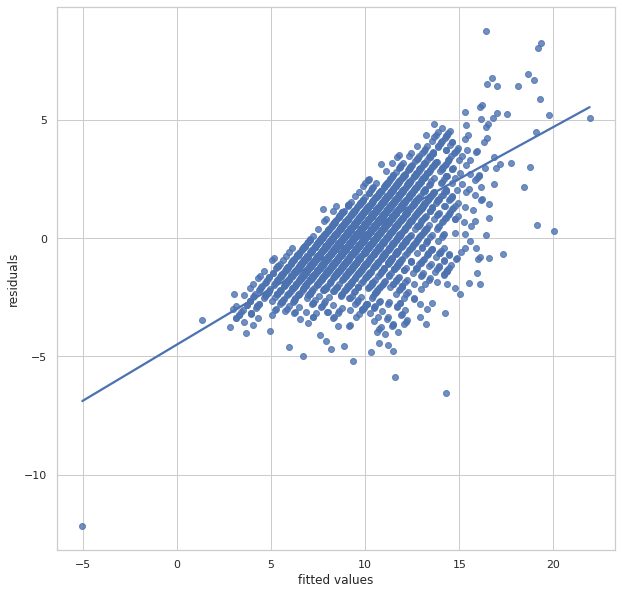

In [ ]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize =(10,10))
sns.regplot(x=lin_reg_dev,y=residual,ax=ax,lowess=True)
ax.set(ylabel='residuals',xlabel='fitted values')

### Baseline Decision Tree Regressor (after PCA)

In [ ]:
dt_reg = tree.DecisionTreeRegressor(random_state =31)
dt_reg.fit(x_train_reg, y_train)

dt_reg_dev = dt_reg.predict(x_train_reg)
dt_reg_pred = dt_reg.predict(x_test_reg)

# Train RMSE
train_rmse = mean_squared_error(y_train, dt_reg_dev, squared=False)
print(f'Train RMSE: {train_rmse}')

# Test RMSE
test_rmse = mean_squared_error(y_test, dt_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

Train RMSE: 0.0
Test RMSE: 3.0654737295567993


### Baseline Decision Tree Regressor (before Yeo-Johnson transform)

In [ ]:
dt_reg_orig = tree.DecisionTreeRegressor(random_state =31)
dt_reg_orig.fit(x_train, y_train)

dt_reg_dev = dt_reg_orig.predict(x_train)
dt_reg_pred = dt_reg_orig.predict(x_test)

# Train RMSE
train_rmse = mean_squared_error(y_train, dt_reg_dev, squared=False)
print(f'Train RMSE: {train_rmse}')

# Test RMSE
test_rmse = mean_squared_error(y_test, dt_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

Train RMSE: 0.0
Test RMSE: 2.957028768672361


### Baseline Random Forest Regressor (after PCA)

In [ ]:
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train_reg, y_train)

rf_reg_dev = rf_reg.predict(x_train_reg)
rf_reg_pred = rf_reg.predict(x_test_reg)

# Train RMSE
train_rmse = mean_squared_error(y_train, rf_reg_dev, squared=False)
print(f'Train RMSE: {train_rmse}')

# Test RMSE
test_rmse = mean_squared_error(y_test, rf_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Train RMSE: 0.8094280575229016
Test RMSE: 2.2869092564788005


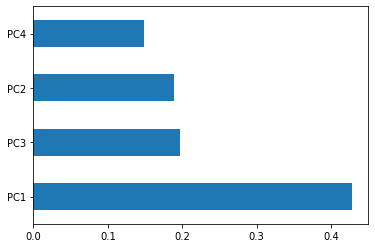

In [ ]:
feat_importances = pd.Series(rf_reg.feature_importances_, index=x_train_reg.columns)
feat_importances.nlargest(4).plot(kind='barh')

### Baseline Random Forest Regressor (before Yeo-Johnson transform)

In [ ]:
rf_reg_orig = RandomForestRegressor()
rf_reg_orig.fit(x_train, y_train)

rf_reg_dev = rf_reg_orig.predict(x_train)
rf_reg_pred = rf_reg_orig.predict(x_test)

# Train RMSE
train_rmse = mean_squared_error(y_train, rf_reg_dev, squared=False)
print(f'Train RMSE: {train_rmse}')

# Test RMSE
test_rmse = mean_squared_error(y_test, rf_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Train RMSE: 0.8022269960849802
Test RMSE: 2.2351312272148167


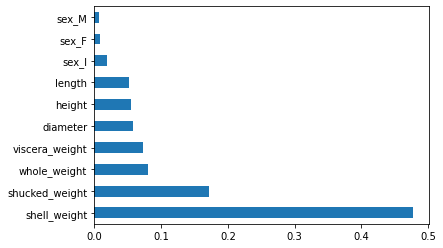

In [ ]:
feat_importances = pd.Series(rf_reg_orig.feature_importances_, index=x_train.columns)
feat_importances.nlargest(10).plot(kind='barh')

### Baseline Bagging Regressor (after PCA)

In [ ]:
bg_reg = BaggingRegressor()
bg_reg.fit(x_train_reg, y_train)

bg_reg_dev = bg_reg.predict(x_train_reg)
bg_reg_pred = bg_reg.predict(x_test_reg)

# Train RMSE
train_rmse = mean_squared_error(y_train, bg_reg_dev, squared=False)
print(f'Train RMSE: {train_rmse}')

# Test RMSE
test_rmse = mean_squared_error(y_test, bg_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

Train RMSE: 0.9855237737620056
Test RMSE: 2.381708606267245


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


### Baseline Bagging Regressor (before Yeo-Johnson transform)

In [ ]:
bg_reg_orig = BaggingRegressor()
bg_reg_orig.fit(x_train, y_train)

bg_reg_dev = bg_reg_orig.predict(x_train)
bg_reg_pred = bg_reg_orig.predict(x_test)

# Train RMSE
train_rmse = mean_squared_error(y_train, bg_reg_dev, squared=False)
print(f'Train RMSE: {train_rmse}')

# Test RMSE
test_rmse = mean_squared_error(y_test, bg_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

Train RMSE: 0.9362818834836647
Test RMSE: 2.2781834028947014


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


### Baseline Ada Boost Regressor (after PCA)

In [ ]:
ab_reg = AdaBoostRegressor()
ab_reg.fit(x_train_reg, y_train)

ab_reg_dev = ab_reg.predict(x_train_reg)
ab_reg_pred = ab_reg.predict(x_test_reg)

# Train RMSE
train_rmse = mean_squared_error(y_train, ab_reg_dev, squared=False)
print(f'Train RMSE: {train_rmse}')

# Test RMSE
test_rmse = mean_squared_error(y_test, ab_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

Train RMSE: 2.6491951727273104
Test RMSE: 2.8124481388653497


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


### Baseline Ada Boost Regressor (before Yeo-Johnson transform)

In [ ]:
ab_reg_orig = AdaBoostRegressor()
ab_reg_orig.fit(x_train, y_train)

ab_reg_dev = ab_reg_orig.predict(x_train)
ab_reg_pred = ab_reg_orig.predict(x_test)

# Train RMSE
train_rmse = mean_squared_error(y_train, ab_reg_dev, squared=False)
print(f'Train RMSE: {train_rmse}')

# Test RMSE
test_rmse = mean_squared_error(y_test, ab_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Train RMSE: 2.786206147671733
Test RMSE: 2.9186341617412714


### Baseline Gradient Boosting Regressor (after PCA)

In [ ]:
gb_reg = GradientBoostingRegressor()
gb_reg.fit(x_train_reg, y_train)

gb_reg_dev = gb_reg.predict(x_train_reg)
gb_reg_pred = gb_reg.predict(x_test_reg)

# Train RMSE
train_rmse = mean_squared_error(y_train, gb_reg_dev, squared=False)
print(f'Train RMSE: {train_rmse}')

# Test RMSE
test_rmse = mean_squared_error(y_test, gb_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Train RMSE: 1.9009315057358038
Test RMSE: 2.211066619759617


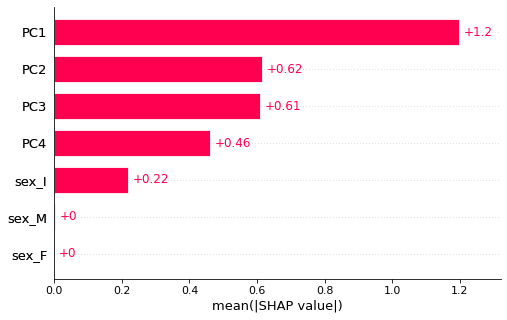

In [ ]:
shap.initjs()
background_data = shap.maskers.Independent(x_train_reg)
explainer = shap.Explainer(gb_reg,background_data)
shap_values = explainer(x_train_reg)

shap.plots.bar(shap_values)

### Baseline Gradient Boosting Regressor (before Yeo-Johnson transform)

In [ ]:
gb_reg_orig = GradientBoostingRegressor()
gb_reg_orig.fit(x_train, y_train)

gb_reg_dev = gb_reg_orig.predict(x_train)
gb_reg_pred = gb_reg_orig.predict(x_test)

# Train RMSE
train_rmse = mean_squared_error(y_train, gb_reg_dev, squared=False)
print(f'Train RMSE: {train_rmse}')

# Test RMSE
test_rmse = mean_squared_error(y_test, gb_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Train RMSE: 1.8708435944422561
Test RMSE: 2.1717030886607427


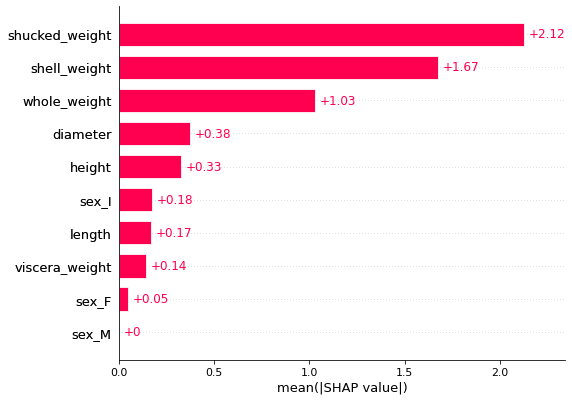

In [ ]:
shap.initjs()
background_data = shap.maskers.Independent(x_train)
explainer = shap.Explainer(gb_reg_orig,background_data)
shap_values = explainer(x_train)

shap.plots.bar(shap_values)

### Baseline Light Gradient Boosting Regressor (after PCA)

In [ ]:
lgb_reg = lgb.LGBMRegressor(random_state=31)
lgb_reg.fit(x_train_reg, y_train)

lgb_reg_dev = lgb_reg.predict(x_train_reg)
lgb_reg_pred = lgb_reg.predict(x_test_reg)

# Train RMSE
train_rmse = mean_squared_error(y_train, lgb_reg_dev, squared=False)
print(f'Train RMSE: {train_rmse}')

# Test RMSE
test_rmse = mean_squared_error(y_test, lgb_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

Train RMSE: 1.4943711491085245
Test RMSE: 2.284217106766006


 99%|===================| 3305/3341 [00:16<00:00]       

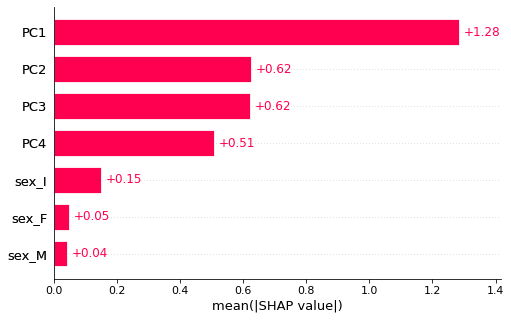

In [ ]:
shap.initjs()
background_data = shap.maskers.Independent(x_train_reg)
explainer = shap.Explainer(lgb_reg,background_data)
shap_values = explainer(x_train_reg)

shap.plots.bar(shap_values)

### Baseline Light Gradient Boosting Regressor (before Yeo-Johnson transform)

In [ ]:
lgb_reg_orig = lgb.LGBMRegressor(random_state=31)
lgb_reg_orig.fit(x_train, y_train)

lgb_reg_dev = lgb_reg_orig.predict(x_train)
lgb_reg_pred = lgb_reg_orig.predict(x_test)

# Train RMSE
train_rmse = mean_squared_error(y_train, lgb_reg_dev, squared=False)
print(f'Train RMSE: {train_rmse}')

# Test RMSE
test_rmse = mean_squared_error(y_test, lgb_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

Train RMSE: 1.4850252948628018
Test RMSE: 2.245860642815371


 95%|=================== | 3162/3341 [00:15<00:00]       

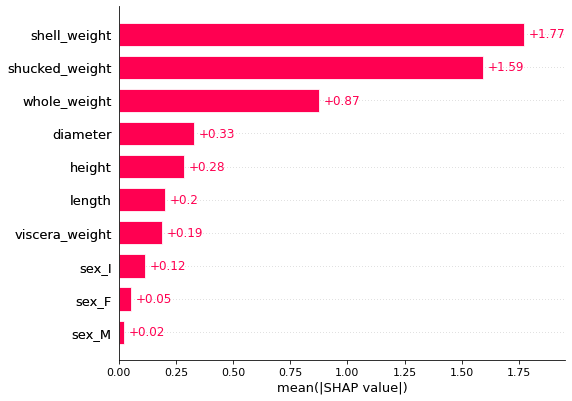

In [ ]:
shap.initjs()
background_data = shap.maskers.Independent(x_train)
explainer = shap.Explainer(lgb_reg_orig,background_data)
shap_values = explainer(x_train,check_additivity=False)

shap.plots.bar(shap_values)

### Baseline Extreme Gradient Boosting Regressor (after PCA)

In [ ]:
xgb_reg = xgb.XGBRegressor(random_state=31)
xgb_reg.fit(x_train_reg, y_train)

xgb_reg_dev = xgb_reg.predict(x_train_reg)
xgb_reg_pred = xgb_reg.predict(x_test_reg)

# Train RMSE
train_rmse = mean_squared_error(y_train, xgb_reg_dev, squared=False)
print(f'Train RMSE: {train_rmse}')

# Test RMSE
test_rmse = mean_squared_error(y_test, xgb_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

[03:08:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 1.92304240688707
Test RMSE: 2.2097201288899835


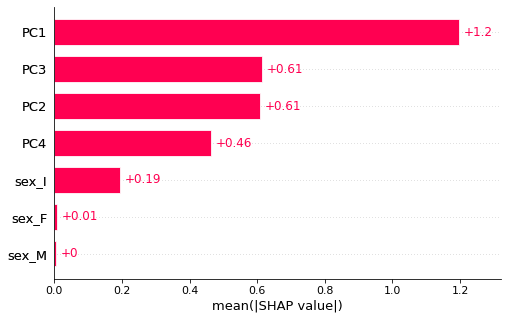

In [ ]:
shap.initjs()
background_data = shap.maskers.Independent(x_train_reg)
explainer = shap.Explainer(xgb_reg,background_data)
shap_values = explainer(x_train_reg)

shap.plots.bar(shap_values)

### Baseline Extreme Gradient Boosting Regressor (before Yeo-Johnson transform)

In [ ]:
xgb_reg_orig = xgb.XGBRegressor(random_state=31)
xgb_reg_orig.fit(x_train, y_train)

xgb_reg_dev = xgb_reg_orig.predict(x_train)
xgb_reg_pred = xgb_reg_orig.predict(x_test)

# Train RMSE
train_rmse = mean_squared_error(y_train, xgb_reg_dev, squared=False)
print(f'Train RMSE: {train_rmse}')

# Test RMSE
test_rmse = mean_squared_error(y_test, xgb_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

[00:44:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 1.8835585746548136
Test RMSE: 2.191125927451345


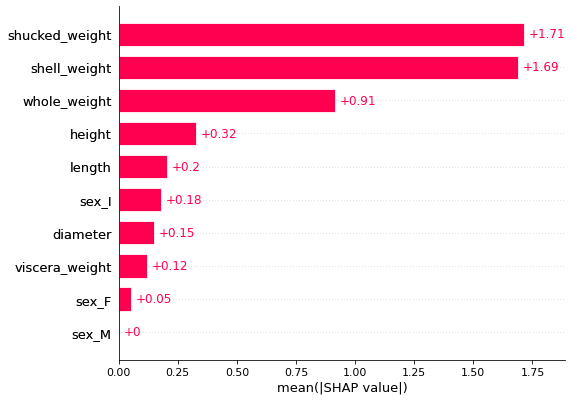

In [ ]:
shap.initjs()
background_data = shap.maskers.Independent(x_train)
explainer = shap.Explainer(xgb_reg_orig,background_data)
shap_values = explainer(x_train)

shap.plots.bar(shap_values)

### Baseline Multi-Layer Perceptron Regressor 1 hidden layer, 5 nodes (after PCA, with standardization)

In [ ]:
MLP_reg = MLPRegressor(hidden_layer_sizes=(5,),max_iter=1000,random_state=31) 
MLP_reg.fit(x_train_reg, y_train)

MLP_reg_dev = MLP_reg.predict(x_train_reg)
MLP_reg_pred = MLP_reg.predict(x_test_reg)

# Train RMSE
train_rmse = mean_squared_error(y_train, MLP_reg_dev, squared=False)
print(f'Train RMSE: {train_rmse}')

# Test RMSE
test_rmse = mean_squared_error(y_test, MLP_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Train RMSE: 2.123782033205103
Test RMSE: 2.215624090293127


### Baseline Multi-Layer Perceptron Regressor 1 hidden layer, 8 nodes (before Yeo-Johnson transform)

In [ ]:
MLP_reg_orig = MLPRegressor(hidden_layer_sizes=(8,),max_iter=1000,random_state=31) 
MLP_reg_orig.fit(x_train, y_train)

MLP_reg_dev = MLP_reg_orig.predict(x_train)
MLP_reg_pred = MLP_reg_orig.predict(x_test)

# Train RMSE
train_rmse = mean_squared_error(y_train, MLP_reg_dev, squared=False)
print(f'Train RMSE: {train_rmse}')

# Test RMSE
test_rmse = mean_squared_error(y_test, MLP_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Train RMSE: 2.145854088520639
Test RMSE: 2.1890279742416014


### Baseline Multi-Layer Perceptron Regressor  1 hidden layer, 5 nodes (after PCA, with normalization)

In [ ]:
scaler = MinMaxScaler()
x_train_reg_norm=scaler.fit_transform(x_train_reg)
x_test_reg_norm=scaler.transform(x_test_reg)

MLP_reg_norm = MLPRegressor(hidden_layer_sizes=(5,),max_iter=2000,random_state=31) 
MLP_reg_norm.fit(x_train_reg_norm, y_train)

MLP_reg_dev = MLP_reg.predict(x_train_reg_norm)
MLP_reg_pred = MLP_reg.predict(x_test_reg_norm)

# Train RMSE
train_rmse = mean_squared_error(y_train, MLP_reg_dev, squared=False)
print(f'Train RMSE: {train_rmse}')

# Test RMSE
test_rmse = mean_squared_error(y_test, MLP_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Train RMSE: 2.206191485541336
Test RMSE: 2.2814967460320132


### Baseline Multi-Layer Perceptron Regressor  1 hidden layer, 8 nodes (before Yeo-Johnson transform, with normalization)

In [ ]:
scaler = MinMaxScaler()
x_train_reg_norm=scaler.fit_transform(x_train)
x_test_reg_norm=scaler.transform(x_test)

MLP_reg_norm_orig = MLPRegressor(hidden_layer_sizes=(8,),max_iter=2000,random_state=31) 
MLP_reg_norm_orig.fit(x_train_reg_norm, y_train)

MLP_reg_dev = MLP_reg_orig.predict(x_train_reg_norm)
MLP_reg_pred = MLP_reg_orig.predict(x_test_reg_norm)

# Train RMSE
train_rmse = mean_squared_error(y_train, MLP_reg_dev, squared=False)
print(f'Train RMSE: {train_rmse}')

# Test RMSE
test_rmse = mean_squared_error(y_test, MLP_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Train RMSE: 5.2787316437615015
Test RMSE: 5.199886145261717


X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names


### Baseline Multi-Layer Perceptron Regressor 2 hidden layers, 8 and 4 nodes (before Yeo-Johnson transform)

In [ ]:
MLP_reg_orig = MLPRegressor(hidden_layer_sizes=(8,4),max_iter=1000,random_state=31) 
MLP_reg_orig.fit(x_train, y_train)

MLP_reg_dev = MLP_reg_orig.predict(x_train)
MLP_reg_pred = MLP_reg_orig.predict(x_test)

# Train RMSE
train_rmse = mean_squared_error(y_train, MLP_reg_dev, squared=False)
print(f'Train RMSE: {train_rmse}')

# Test RMSE
test_rmse = mean_squared_error(y_test, MLP_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Train RMSE: 2.1109317850838183
Test RMSE: 2.1361902611584336


### Baseline Multi-Layer Perceptron Regressor 3 hidden layers, 8, 4 and 2 nodes (before Yeo-Johnson transform)

In [ ]:
MLP_reg_orig = MLPRegressor(hidden_layer_sizes=(8,4,2),max_iter=1000,random_state=31) 
MLP_reg_orig.fit(x_train, y_train)

MLP_reg_dev = MLP_reg_orig.predict(x_train)
MLP_reg_pred = MLP_reg_orig.predict(x_test)

# Train RMSE
train_rmse = mean_squared_error(y_train, MLP_reg_dev, squared=False)
print(f'Train RMSE: {train_rmse}')

# Test RMSE
test_rmse = mean_squared_error(y_test, MLP_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Train RMSE: 2.0859856196609674
Test RMSE: 2.108373410125448


### Baseline Voting Regressor (after PCA)

In [ ]:
#Voting classifier takes all of the inputs and averages the results. 

voting_reg = VotingRegressor(estimators =[('MLP_reg',MLP_reg,('lin_reg',lin_reg),('rf_reg',rf_reg),('lgb_reg',lgb_reg),('xgb_reg',xgb_reg)]) 
voting_reg.fit(x_train_reg, y_train)

voting_reg_dev = voting_reg.predict(x_train_reg)
voting_reg_pred = voting_reg.predict(x_test_reg)

# Train RMSE
train_rmse = mean_squared_error(y_train, voting_reg_dev, squared=False)
print(f'Train RMSE: {train_rmse}')

# Test RMSE
test_rmse = mean_squared_error(y_test, voting_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[05:03:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 1.6688340727454334
Test RMSE: 2.2082529081520366


### Baseline Voting Regressor (before Yeo-Johnson transform)

In [ ]:
#Voting classifier takes all of the inputs and averages the results. 

voting_reg = VotingRegressor(estimators =[('MLP_reg_orig',MLP_reg_orig),('lin_reg_orig',lin_reg_orig),('rf_reg_orig',rf_reg_orig),('lgb_reg_orig',lgb_reg_orig),('xgb_reg_orig',xgb_reg_orig)]) 
voting_reg.fit(x_train, y_train)

voting_reg_dev = voting_reg.predict(x_train)
voting_reg_pred = voting_reg.predict(x_test)

# Train RMSE
train_rmse = mean_squared_error(y_train, voting_reg_dev, squared=False)
print(f'Train RMSE: {train_rmse}')

# Test RMSE
test_rmse = mean_squared_error(y_test, voting_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[01:23:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 1.6369828529409554
Test RMSE: 2.1381358110447315


### Baseline Multiple Linear Regression (after Kernel PCA)

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(x_train_reg_3, y_train)

lin_reg_dev = lin_reg.predict(x_train_reg_3)
lin_reg_pred = lin_reg.predict(x_test_reg_3)

# Train set RMSE
train_rmse = mean_squared_error(y_train, lin_reg_dev, squared=False)
print(f'Train RMSE: {train_rmse}')

# Test set RMSE
test_rmse = mean_squared_error(y_test, lin_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

Train RMSE: 2.151404157112964
Test RMSE: 2.4636253652628697


### Baseline Gradient Boosting Regressor (after Kernel PCA)

In [ ]:
gb_reg_orig = GradientBoostingRegressor()
gb_reg_orig.fit(x_train_reg_3, y_train)

gb_reg_dev = gb_reg_orig.predict(x_train_reg_3)
gb_reg_pred = gb_reg_orig.predict(x_test_reg_3)

# Train RMSE
train_rmse = mean_squared_error(y_train, gb_reg_dev, squared=False)
print(f'Train RMSE: {train_rmse}')

# Test RMSE
test_rmse = mean_squared_error(y_test, gb_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Train RMSE: 1.8432357144067895
Test RMSE: 2.1193523301148898


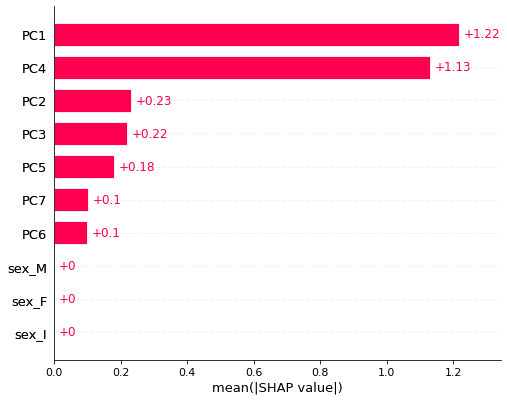

In [ ]:
shap.initjs()
background_data = shap.maskers.Independent(x_train_reg_3)
explainer = shap.Explainer(gb_reg_orig,background_data)
shap_values = explainer(x_train_reg_3)

shap.plots.bar(shap_values)

### Baseline Light Gradient Boosting Regressor (after Kernel PCA)

In [ ]:
lgb_reg_orig = lgb.LGBMRegressor(random_state=31)
lgb_reg_orig.fit(x_train_reg_3, y_train)

lgb_reg_dev = lgb_reg_orig.predict(x_train_reg_3)
lgb_reg_pred = lgb_reg_orig.predict(x_test_reg_3)

# Train RMSE
train_rmse = mean_squared_error(y_train, lgb_reg_dev, squared=False)
print(f'Train RMSE: {train_rmse}')

# Test RMSE
test_rmse = mean_squared_error(y_test, lgb_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

Train RMSE: 1.3817898309045962
Test RMSE: 2.1685596356478483


 97%|=================== | 3255/3341 [00:17<00:00]       

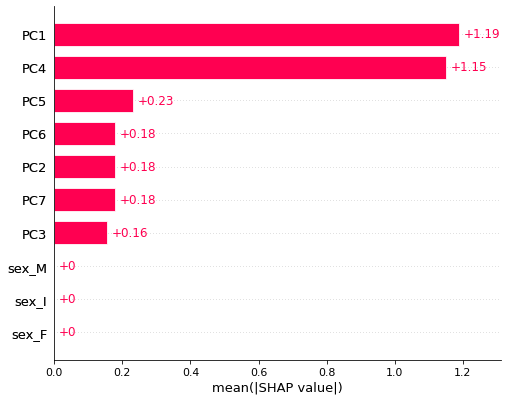

In [ ]:
shap.initjs()
background_data = shap.maskers.Independent(x_train_reg_3)
explainer = shap.Explainer(lgb_reg_orig,background_data)
shap_values = explainer(x_train_reg_3)

shap.plots.bar(shap_values)

### Baseline Extreme Gradient Boosting Regressor (after Kernel PCA)

In [ ]:
xgb_reg_orig = xgb.XGBRegressor(random_state=31)
xgb_reg_orig.fit(x_train_reg_3, y_train)

xgb_reg_dev = xgb_reg_orig.predict(x_train_reg_3)
xgb_reg_pred = xgb_reg_orig.predict(x_test_reg_3)

# Train RMSE
train_rmse = mean_squared_error(y_train, xgb_reg_dev, squared=False)
print(f'Train RMSE: {train_rmse}')

# Test RMSE
test_rmse = mean_squared_error(y_test, xgb_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

[02:11:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 1.8598196675226624
Test RMSE: 2.0942081135425417


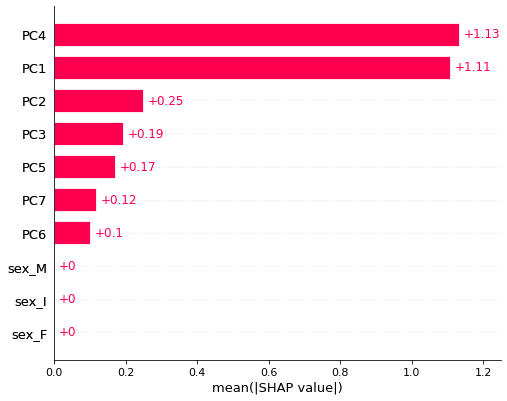

In [ ]:
shap.initjs()
background_data = shap.maskers.Independent(x_train_reg_3)
explainer = shap.Explainer(xgb_reg_orig,background_data)
shap_values = explainer(x_train_reg_3)

shap.plots.bar(shap_values)

### Baseline Multi-Layer Perceptron Regressor 1 hidden layer, 8 nodes (after Kernel PCA)

In [ ]:
MLP_reg_orig = MLPRegressor(hidden_layer_sizes=(8,),max_iter=1000,random_state=31) 
MLP_reg_orig.fit(x_train_reg_3, y_train)

MLP_reg_dev = MLP_reg_orig.predict(x_train_reg_3)
MLP_reg_pred = MLP_reg_orig.predict(x_test_reg_3)

# Train RMSE
train_rmse = mean_squared_error(y_train, MLP_reg_dev, squared=False)
print(f'Train RMSE: {train_rmse}')

# Test RMSE
test_rmse = mean_squared_error(y_test, MLP_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Train RMSE: 2.1393974703997416
Test RMSE: 2.1926508545853123


### Baseline Multi-Layer Perceptron Regressor 2 hidden layers, 8 and 4 nodes (after Kernel PCA)

In [ ]:
MLP_reg_orig = MLPRegressor(hidden_layer_sizes=(8,4),max_iter=1000,random_state=31) 
MLP_reg_orig.fit(x_train_reg_3, y_train)

MLP_reg_dev = MLP_reg_orig.predict(x_train_reg_3)
MLP_reg_pred = MLP_reg_orig.predict(x_test_reg_3)

# Train RMSE
train_rmse = mean_squared_error(y_train, MLP_reg_dev, squared=False)
print(f'Train RMSE: {train_rmse}')

# Test RMSE
test_rmse = mean_squared_error(y_test, MLP_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Train RMSE: 2.0876557741290855
Test RMSE: 2.117216415061366


### Baseline Multi-Layer Perceptron Regressor 3 hidden layers, 8, 4 and 2 nodes (after Kernel PCA)

In [ ]:
MLP_reg_orig = MLPRegressor(hidden_layer_sizes=(8,4,2),max_iter=1000,random_state=31) 
MLP_reg_orig.fit(x_train_reg_3, y_train)

MLP_reg_dev = MLP_reg_orig.predict(x_train_reg_3)
MLP_reg_pred = MLP_reg_orig.predict(x_test_reg_3)

# Train RMSE
train_rmse = mean_squared_error(y_train, MLP_reg_dev, squared=False)
print(f'Train RMSE: {train_rmse}')

# Test RMSE
test_rmse = mean_squared_error(y_test, MLP_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Train RMSE: 2.095709640999109
Test RMSE: 2.129440878084883


## 4. Hyperparameter Tuning (Tuned Model Performance)
After getting the baselines, I tried to improve the model performance using hyperparameter tuning.

The tuned model performance (in terms of RMSE) can be found in the table below:

| Tuned Model | Train RMSE | Test RMSE |
| --- | --- | --- |
    | Tuned Multiple Linear Regression with Interactions and Regularization (ridge regression) |2.08 | 2.16|
    | Tuned Multiple Linear Regression with Interactions and Regularization (Lasso) |2.08 | 2.15 |
    | Tuned Extreme Gradient Boosting Regressor| 1.88 | 2.21  |
    | Tuned Feed-Forward Neural Network| 2.15 | 2.20  |
    | Tuned Extreme Gradient Boosting Regressor (after Kernel PCA) | 1.93 | 2.11  |
    | Tuned Feed-Forward Neural Network (after Kernel PCA)|2.05  |  2.08 |



In [ ]:
from sklearn.model_selection import GridSearchCV 

#simple performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

### Tuned Multiple Linear Regression with Interactions and Regularization (ridge regression)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import scipy.special
poly = PolynomialFeatures(interaction_only=True)
X_tr = poly.fit_transform(x_train)
X_train_w_inter = pd.concat([x_train,pd.DataFrame(X_tr,columns=poly.get_feature_names_out()).drop(['1', 'length', 'diameter', 'height', 'whole_weight',
       'shucked_weight', 'viscera_weight', 'shell_weight', 'sex_F',
       'sex_I', 'sex_M'],1)],1)

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only


In [ ]:
X_ts = poly.transform(x_test)
X_test_w_inter = pd.concat([x_test,pd.DataFrame(X_ts,columns=poly.get_feature_names_out()).drop(['1', 'length', 'diameter', 'height', 'whole_weight',
       'shucked_weight', 'viscera_weight', 'shell_weight', 'sex_F',
       'sex_I', 'sex_M'],1)],1)

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only


In [ ]:
ridge = Ridge(random_state=31)

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_root_mean_squared_error', cv=5)

ridge_regressor.fit(X_tr, y_train);

clf_performance(ridge_regressor,'Multiple Linear Regression')

Multiple Linear Regression
Best Score: -2.1186233280644076
Best Parameters: {'alpha': 0.01}


In [ ]:
ridge_reg = Ridge(alpha=0.01,random_state=31)
ridge_reg.fit(X_tr, y_train)

ridge_reg_dev = ridge_reg.predict(X_tr)
ridge_reg_pred = ridge_reg.predict(X_ts)

# Train RMSE
train_rmse = mean_squared_error(y_train, ridge_reg_dev, squared=False)
print(f'Train RMSE: {train_rmse}')

# Test RMSE
test_rmse = mean_squared_error(y_test, ridge_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

Train RMSE: 2.0788725537659802
Test RMSE: 2.157840592997405


### Tuned Multiple Linear Regression with Interactions and Regularization (Lasso)

In [ ]:
lasso = Lasso(tol=0.05,max_iter=7000,random_state=31)

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)

lasso_regressor.fit(X_tr, y_train)

clf_performance(lasso_regressor,'Multiple Linear Regression')

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.761e+03, tolerance: 1.370e+03
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.000e+03, tolerance: 1.404e+03
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.517e+03, tolerance: 1.292e+03
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.860e+03, tolerance: 1.341e+03
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.498e+03, tolerance: 1.302e+03
Objective did n

Multiple Linear Regression
Best Score: -4.51275805452971
Best Parameters: {'alpha': 0.0001}


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.951e+03, tolerance: 1.678e+03


In [ ]:
lasso_reg = Lasso(alpha=0.0001,max_iter=100000,random_state=31)
lasso_reg.fit(X_tr, y_train)

lasso_reg_dev = lasso_reg.predict(X_tr)
lasso_reg_pred = lasso_reg.predict(X_ts)

# Train RMSE
train_rmse = mean_squared_error(y_train, lasso_reg_dev, squared=False)
print(f'Train RMSE: {train_rmse}')

# Test RMSE
test_rmse = mean_squared_error(y_test, lasso_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

Train RMSE: 2.082534236035284
Test RMSE: 2.1539811553724957


### Tuned Extreme Gradient Boosting Regressor

In [ ]:
param_grid = {'max_depth': np.arange(1,10,1),
              'n_estimators': np.arange(1,100,1)
             }

xgb_reg = xgb.XGBRegressor(random_state=31)

# run grid search
xgb_regressor = GridSearchCV(xgb_reg, param_grid = param_grid,scoring='neg_root_mean_squared_error', cv = 5, n_jobs = -1)
xgb_regressor.fit(x_train,y_train)
clf_performance(xgb_regressor,'Extreme Gradient Boosting Regressor')

[02:43:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Extreme Gradient Boosting Regressor
Best Score: -2.1680281224208353
Best Parameters: {'max_depth': 4, 'n_estimators': 48}


In [ ]:
xgb_reg = xgb.XGBRegressor(random_state=31,max_depth=4,n_estimators=48)
xgb_reg.fit(x_train, y_train)

xgb_reg_dev = xgb_reg.predict(x_train)
xgb_reg_pred = xgb_reg.predict(x_test)

# Train RMSE
train_rmse = mean_squared_error(y_train, xgb_reg_dev, squared=False)
print(f'Train RMSE: {train_rmse}')

# Test RMSE
test_rmse = mean_squared_error(y_test, xgb_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

[02:47:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 1.8820979496974795
Test RMSE: 2.2108877761165093


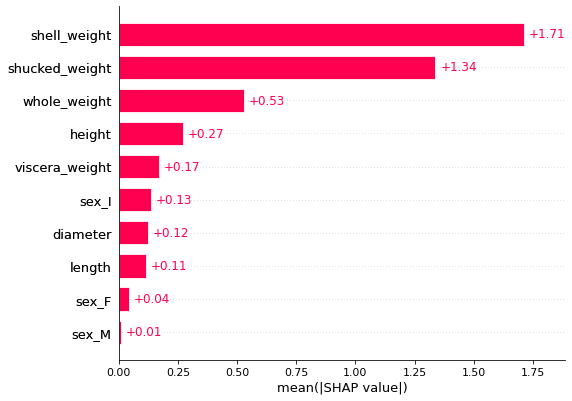

In [ ]:
shap.initjs()
background_data = shap.maskers.Independent(x_train)
explainer = shap.Explainer(xgb_reg,background_data)
shap_values = explainer(x_train)

shap.plots.bar(shap_values)

### Tuned Feed-Forward Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Input,Dense
from keras.callbacks import EarlyStopping
import keras
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

In [ ]:
checkpoint_path = "/content/keras_checkpoint_best.ckpt" 

model_checkpoint = ModelCheckpoint(filepath=checkpoint_path, verbose=1, save_best_only=True)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adadelta,Adam,RMSprop
import hyperopt
import tensorflow as tf
from hyperopt import fmin, hp, tpe, STATUS_OK, Trials

import sys

space = {   'units1': hp.quniform('units1', 0,20,1),
            'units2': hp.quniform('units2', 0,20,1),
            'units3': hp.quniform('units3', 0,20,1),
            'activation_1':  hp.choice('activation_1',['relu', 'tanh', 'sigmoid','elu','selu','swish']),
            'activation_2':  hp.choice('activation_2',['relu', 'tanh', 'sigmoid','elu','selu','swish']),
            'activation_3':  hp.choice('activation_3',['relu', 'tanh', 'sigmoid','elu','selu','swish']),
            "learning_rate": hp.choice('learning_rate', [0.001,0.005,0.01]),
            'dropout1': hp.choice('dropout1', [0.0,0.05,0.10,0.25]),
            'dropout2': hp.choice('dropout2',  [0.0,0.05,0.10,0.25]),
            'dropout3': hp.choice('dropout3',  [0.0,0.05,0.10,0.25]),
            'optimizer': hp.choice('optimizer',['Adadelta','Adam','RMSprop'])        
        }

def f_nn(params):   
    print ('Params testing: ', params)
      # Log run information with mlflow.tensorflow.autolog()
        # Select optimizer
    tf.random.set_seed(31)
    optimizer_call = getattr(tf.keras.optimizers, params["optimizer"])
    optimizer = optimizer_call(learning_rate=params["learning_rate"])    
        
    model = Sequential()
    model.add(Dense(units=params['units1'], kernel_initializer='normal',activation=params['activation_1'], input_dim = x_train.shape[1])) 
    model.add(Dropout(params['dropout1']))

    model.add(Dense(units=params['units2'],activation=params['activation_2']))
    model.add(Dropout(params['dropout2'])) 
    model.add(Dense(units=params['units3'],activation=params['activation_3']))
    model.add(Dropout(params['dropout3'])) 
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mse', optimizer=params['optimizer'])


    model.fit(x_train, y_train, epochs=20,validation_split=.2, batch_size=32, verbose = 2)
    dev=model.predict(x_train, batch_size = 32, verbose = 0)
    preds =model.predict(x_test, batch_size = 32, verbose = 0)
    mse_train=mean_squared_error(y_train, dev, squared=False)
    mse_test = mean_squared_error(y_test, preds,squared=False)
    return {'loss': mse_test, 'status': STATUS_OK}


spark_trials = Trials()
best = fmin(f_nn, space, algo=tpe.suggest, max_evals=50, trials=spark_trials)
print(hyperopt.space_eval(space, best))

Params testing: 
{'activation_1': 'tanh', 'activation_2': 'relu', 'activation_3': 'elu', 'dropout1': 0.1, 'dropout2': 0.25, 'dropout3': 0.1, 'learning_rate': 0.005, 'optimizer': 'Adam', 'units1': 17.0, 'units2': 1.0, 'units3': 5.0}
Epoch 1/20

84/84 - 1s - loss: 105.8674 - val_loss: 104.6211 - 776ms/epoch - 9ms/step

Epoch 2/20

84/84 - 0s - loss: 98.2727 - val_loss: 96.1370 - 198ms/epoch - 2ms/step

Epoch 3/20

84/84 - 0s - loss: 89.0114 - val_loss: 85.9662 - 146ms/epoch - 2ms/step

Epoch 4/20

84/84 - 0s - loss: 78.4150 - val_loss: 74.8789 - 151ms/epoch - 2ms/step

Epoch 5/20

84/84 - 0s - loss: 67.4361 - val_loss: 63.6244 - 151ms/epoch - 2ms/step

Epoch 6/20

84/84 - 0s - loss: 56.5509 - val_loss: 52.8591 - 149ms/epoch - 2ms/step

Epoch 7/20

84/84 - 0s - loss: 46.2566 - val_loss: 43.0446 - 145ms/epoch - 2ms/step

Epoch 8/20

84/84 - 0s - loss: 37.1783 - val_loss: 34.5633 - 150ms/epoch - 2ms/step

Epoch 9/20

84/84 - 0s - loss: 29.5913 - val_loss: 27.6420 - 148ms/epoch - 2ms/step

E

In [ ]:
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adadelta,Adam,RMSprop
import hyperopt
import tensorflow as tf

tf.random.set_seed(31)

def tuned_neural_network():
    model = Sequential()
    model.add(Dense(18, input_dim=10, kernel_initializer='normal', activation='tanh'))
    model.add(Dropout(0.05))
    model.add(Dense(19, activation="selu"))
    model.add(Dropout(0.1))
    model.add(Dense(13, activation="elu"))
    model.add(Dropout(0.1))
    model.add(Dense(1, activation="linear"))
    return model

optimiser=tf.keras.optimizers.RMSprop(0.001)

tuned_neural_network=tuned_neural_network()

tuned_neural_network.compile(loss='mse',optimizer=optimiser)
tuned_neural_network.fit(x_train, y_train,epochs=100,batch_size=16,callbacks=[model_checkpoint],validation_split=.1)

Epoch 1/100
184/188 [============================>.] - ETA: 0s - loss: 22.9148
Epoch 1: val_loss improved from inf to 6.69717, saving model to /content/keras_checkpoint_best.ckpt
INFO:tensorflow:Assets written to: /content/keras_checkpoint_best.ckpt/assets
188/188 [==============================] - 3s 9ms/step - loss: 22.6049 - val_loss: 6.6972
Epoch 2/100
185/188 [============================>.] - ETA: 0s - loss: 8.7365
Epoch 2: val_loss improved from 6.69717 to 6.45584, saving model to /content/keras_checkpoint_best.ckpt
INFO:tensorflow:Assets written to: /content/keras_checkpoint_best.ckpt/assets
188/188 [==============================] - 1s 7ms/step - loss: 8.7200 - val_loss: 6.4558
Epoch 3/100
165/188 [=========================>....] - ETA: 0s - loss: 8.6230
Epoch 3: val_loss improved from 6.45584 to 6.33392, saving model to /content/keras_checkpoint_best.ckpt
INFO:tensorflow:Assets written to: /content/keras_checkpoint_best.ckpt/assets
188/188 [==============================] - 1

In [ ]:
tuned_neural_network.load_weights("/content/keras_checkpoint_best.ckpt")


dev=tuned_neural_network.predict(x_train, batch_size = 32, verbose = 0)
preds =tuned_neural_network.predict(x_test, batch_size = 32, verbose = 0)

# Train RMSE
train_rmse = mean_squared_error(y_train, dev, squared=False)
print(f'Train RMSE: {train_rmse}')

# Test RMSE
test_rmse = mean_squared_error(y_test, preds, squared=False)
print(f'Test RMSE: {test_rmse}')

Train RMSE: 2.1454317418404596
Test RMSE: 2.1995539318362183


### Tuned Extreme Gradient Boosting Regressor after Kernel PCA

In [ ]:
param_grid = {'max_depth': np.arange(1,10,1),
              'n_estimators': np.arange(1,100,1),
              'learning_rate':np.linspace(0.005, 0.1, 7, endpoint=True)
             }

xgb_reg = xgb.XGBRegressor(random_state=31)

# run grid search
xgb_regressor = GridSearchCV(xgb_reg, param_grid = param_grid,scoring='neg_root_mean_squared_error', cv = 5, n_jobs = -1)
xgb_regressor.fit(x_train_reg_3,y_train)
clf_performance(xgb_regressor,'Extreme Gradient Boosting Regressor')

[20:14:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Extreme Gradient Boosting Regressor
Best Score: -2.108782989851446
Best Parameters: {'learning_rate': 0.08416666666666668, 'max_depth': 3, 'n_estimators': 67}


In [ ]:
xgb_reg = xgb.XGBRegressor(random_state=31,max_depth=3,n_estimators=67,learning_rate=0.08416666666666668)
xgb_reg.fit(x_train_reg_3, y_train)

xgb_reg_dev = xgb_reg.predict(x_train_reg_3)
xgb_reg_pred = xgb_reg.predict(x_test_reg_3)

# Train RMSE
train_rmse = mean_squared_error(y_train, xgb_reg_dev, squared=False)
print(f'Train RMSE: {train_rmse}')

# Test RMSE
test_rmse = mean_squared_error(y_test, xgb_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

[20:15:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 1.9287606844985754
Test RMSE: 2.1143772012178492


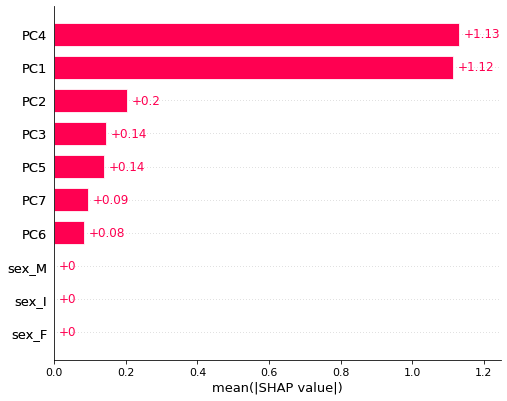

In [ ]:
shap.initjs()
background_data = shap.maskers.Independent(x_train_reg_3)
explainer = shap.Explainer(xgb_reg,background_data)
shap_values = explainer(x_train_reg_3)

shap.plots.bar(shap_values)

### Tuned Feed-Forward Neural Network with Kernel PCA

In [ ]:
from keras.models import Sequential
from keras.layers import Input,Dense
from keras.callbacks import EarlyStopping
import keras
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

In [ ]:
checkpoint_path = "/content/keras_checkpoint_best.ckpt" 

model_checkpoint = ModelCheckpoint(filepath=checkpoint_path, verbose=1, save_best_only=True)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adadelta,Adam,RMSprop
import hyperopt
import tensorflow as tf
from hyperopt import fmin, hp, tpe, STATUS_OK, Trials

import sys

space = {   'units1': hp.quniform('units1', 0,20,1),
            'units2': hp.quniform('units2', 0,20,1),
            'units3': hp.quniform('units3', 0,20,1),
            'activation_1':  hp.choice('activation_1',['relu', 'tanh', 'sigmoid','elu','selu','swish']),
            'activation_2':  hp.choice('activation_2',['relu', 'tanh', 'sigmoid','elu','selu','swish']),
            'activation_3':  hp.choice('activation_3',['relu', 'tanh', 'sigmoid','elu','selu','swish']),
            "learning_rate": hp.choice('learning_rate', [0.001,0.005,0.01]),
            'dropout1': hp.choice('dropout1', [0.0,0.05,0.10,0.25]),
            'dropout2': hp.choice('dropout2',  [0.0,0.05,0.10,0.25]),
            'dropout3': hp.choice('dropout3',  [0.0,0.05,0.10,0.25]),
            'optimizer': hp.choice('optimizer',['Adadelta','Adam','RMSprop'])        
        }

def f_nn(params):   
    print ('Params testing: ', params)
      # Log run information with mlflow.tensorflow.autolog()
        # Select optimizer
    tf.random.set_seed(31)
    optimizer_call = getattr(tf.keras.optimizers, params["optimizer"])
    optimizer = optimizer_call(learning_rate=params["learning_rate"])    
        
    model = Sequential()
    model.add(Dense(units=params['units1'], kernel_initializer='normal',activation=params['activation_1'], input_dim = x_train.shape[1])) 
    model.add(Dropout(params['dropout1']))

    model.add(Dense(units=params['units2'],activation=params['activation_2']))
    model.add(Dropout(params['dropout2'])) 
    model.add(Dense(units=params['units3'],activation=params['activation_3']))
    model.add(Dropout(params['dropout3'])) 
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mse', optimizer=params['optimizer'])


    model.fit(x_train_reg_3, y_train, epochs=20,validation_split=.2, batch_size=32, verbose = 2)
    dev=model.predict(x_train_reg_3, batch_size = 32, verbose = 0)
    preds =model.predict(x_test_reg_3, batch_size = 32, verbose = 0)
    mse_train=mean_squared_error(y_train, dev, squared=False)
    mse_test = mean_squared_error(y_test, preds,squared=False)
    return {'loss': mse_test, 'status': STATUS_OK}


spark_trials = Trials()
best = fmin(f_nn, space, algo=tpe.suggest, max_evals=50, trials=spark_trials)
print(hyperopt.space_eval(space, best))

Params testing: 
{'activation_1': 'sigmoid', 'activation_2': 'swish', 'activation_3': 'elu', 'dropout1': 0.05, 'dropout2': 0.05, 'dropout3': 0.0, 'learning_rate': 0.001, 'optimizer': 'Adam', 'units1': 16.0, 'units2': 2.0, 'units3': 6.0}
Epoch 1/20

84/84 - 1s - loss: 107.2075 - val_loss: 99.6631 - 1s/epoch - 15ms/step

Epoch 2/20

84/84 - 0s - loss: 78.0529 - val_loss: 54.9859 - 183ms/epoch - 2ms/step

Epoch 3/20

84/84 - 0s - loss: 32.9790 - val_loss: 17.1787 - 234ms/epoch - 3ms/step

Epoch 4/20

84/84 - 0s - loss: 13.4631 - val_loss: 10.6382 - 174ms/epoch - 2ms/step

Epoch 5/20

84/84 - 0s - loss: 12.7825 - val_loss: 9.9293 - 187ms/epoch - 2ms/step

Epoch 6/20

84/84 - 0s - loss: 12.3199 - val_loss: 9.5505 - 217ms/epoch - 3ms/step

Epoch 7/20

84/84 - 0s - loss: 12.1271 - val_loss: 9.1729 - 201ms/epoch - 2ms/step

Epoch 8/20

84/84 - 0s - loss: 11.6177 - val_loss: 9.0075 - 186ms/epoch - 2ms/step

Epoch 9/20

84/84 - 0s - loss: 11.2258 - val_loss: 8.7946 - 179ms/epoch - 2ms/step

Epoc

In [ ]:
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adadelta,Adam,RMSprop
import hyperopt
import tensorflow as tf

tf.random.set_seed(31)

def tuned_neural_network():
    model = Sequential()
    model.add(Dense(15, input_dim=10, kernel_initializer='normal', activation='selu'))
    model.add(Dense(18, activation="relu"))
    model.add(Dropout(0.05))
    model.add(Dense(14, activation="selu"))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation="linear"))
    return model

optimiser=tf.keras.optimizers.Adam(0.005)

tuned_neural_network=tuned_neural_network()

tuned_neural_network.compile(loss='mse',optimizer=optimiser)
tuned_neural_network.fit(x_train_reg_3, y_train,epochs=100,batch_size=16,callbacks=[model_checkpoint],validation_split=.1)

Epoch 1/100
184/188 [============================>.] - ETA: 0s - loss: 18.4680
Epoch 1: val_loss improved from inf to 6.28743, saving model to /content/keras_checkpoint_best.ckpt
INFO:tensorflow:Assets written to: /content/keras_checkpoint_best.ckpt/assets
188/188 [==============================] - 3s 14ms/step - loss: 18.2675 - val_loss: 6.2874
Epoch 2/100
167/188 [=========================>....] - ETA: 0s - loss: 9.0508
Epoch 2: val_loss improved from 6.28743 to 5.65252, saving model to /content/keras_checkpoint_best.ckpt
INFO:tensorflow:Assets written to: /content/keras_checkpoint_best.ckpt/assets
188/188 [==============================] - 3s 14ms/step - loss: 9.0375 - val_loss: 5.6525
Epoch 3/100
176/188 [===========================>..] - ETA: 0s - loss: 8.2418
Epoch 3: val_loss improved from 5.65252 to 5.26187, saving model to /content/keras_checkpoint_best.ckpt
INFO:tensorflow:Assets written to: /content/keras_checkpoint_best.ckpt/assets
188/188 [==============================] -

In [ ]:
tuned_neural_network.load_weights("/content/keras_checkpoint_best.ckpt")


dev=tuned_neural_network.predict(x_train_reg_3, batch_size = 32, verbose = 0)
preds =tuned_neural_network.predict(x_test_reg_3, batch_size = 32, verbose = 0)

# Train RMSE
train_rmse = mean_squared_error(y_train, dev, squared=False)
print(f'Train RMSE: {train_rmse}')

# Test RMSE
test_rmse = mean_squared_error(y_test, preds, squared=False)
print(f'Test RMSE: {test_rmse}')

Train RMSE: 2.054581954465659
Test RMSE: 2.0753268260142583


## 5. Conclusion

The model that performs the best is the tuned feed-forward neural network after Kernel PA with 3 hidden layers (with activations SELU, RELU and SELU, with 15, 18 and respectively 14 nodes and dropouts of 0.05 after the second layer and 0.25 after the third layer)  with a training RMSE of 2.05 and a test RMSE of 2.08.

Note: The original data (the numeric variables) is already scaled for use with ANN. Before using Kernel PCA, the extreme values in the independent variables were winsorised and centered.